# **Crypto market capitalization forecast based on S&P 500.**

## **Abstract**
This project investigates the use of machine learning and deep learning models to predict the total cryptocurrency market capitalization. The goal is to evaluate different modeling approaches and identify which models offer the best performance in terms of both numerical accuracy and directional trend prediction. Four model families were explored: Linear Regression, Artificial Neural Networks (ANN), Long Short-Term Memory (LSTM) networks, and Gated Recurrent Units (GRU). Decision trees were discontinued due to poor performance.

Each model was trained and tested on historical S&p500, VIX, and crypto market data, which then has been evaluated using key performance metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R² score, and Mean Directional Accuracy (MDA). Results show that while Linear Regression achieved the lowest error rates and best R² score, the GRU model performed best in predicting the correct market direction, with an MDA of 63.16%.

The findings highlight a trade-off between predicting exact market cap values and correctly anticipating market movements. Simpler models tend to be more stable and accurate in value estimation, while sequence-based models like GRU and LSTM are better suited for directional forecasting. These insights can be valuable for decision-making in trading strategies and financial analysis.

## **Introduction**
The cryptocurrency market, characterized by its high volatility, is increasingly influenced by traditional financial markets, particularly the S&P 500. While prior research has focused on predicting individual cryptocurrency prices using sentiment analysis or technical indicators, the broader relationship between equity markets and aggregate crypto market capitalization remains underexplored. This gap is critical because understanding cross-market dependencies can empower investors to mitigate risks and refine trading strategies. However, challenges such as nonlinear correlations, data misalignment, noise from macroeconomic factors, and crypto high volatility complicate modeling efforts. Previous attempts, like LSTMs for price forecasting or hybrid models combining sentiment and price data, demonstrate the potential of machine learning but overlook systemic linkages between markets [1] [2].

This project addresses these limitations by investigating whether S&P 500 movements can predict daily changes in crypto market capitalization. The study employs a multiple models: (1) linear regression as a baseline, (2) artificial neural networks (ANNs) to capture nonlinear relationships, and (3) recurrent neural networks (LSTMs and GRUs) to model temporal dependencies in the time-series data. Initial experiments with tree-based methods (XGBoost and Random Forest) were discontinued as they demonstrated poor performance, likely due to their inherent difficulty in effectively modeling the continuous, volatile nature of financial time-series data and their weaker handling of temporal dependencies compared to RNN architectures. To enhance model robustness, advanced techniques including dropout (for regularization), batch normalization (for stabilizing ANN training), and layer normalization (particularly effective for the RNN models) were implemented. By meticulously aligning and preprocessing the heterogeneous time-series data, the research provides actionable insights into cross-market dynamics while offering a more comprehensive macroeconomic perspective than previous studies.

All data for this project has been gathered from CoinCodex[3] for crypto data, Nasdaq[4] for S&P500 data, and Cboe[5] for VIX data, and Kaggle [6] for any missing values.

## **Methodology**
Describe the important steps you took to achieve your goal. Focus more on the most important steps (preprocessing, extra features, model aspects) that turned out to be important. Mention the original aspects of the project and state how they relate to existing work.

In this section, you can add **text** and **figures**. For instance, it is strongly suggested to add a picture of the best machine learning model that you implemented to solve your problem (and describe it).

This study adopts a structured pipeline to investigate the relationship between S&P 500 movements and cryptocurrency market capitalization changes. The methodology emphasizes (1) rigorous preprocessing to align heterogeneous financial data, (2) modular model architectures with progressive complexity, and (3) targeted normalization techniques to stabilize training. Below are the critical steps:

1. **Preprocessing**:  
    - Data Cleaning: Raw crypto (2017-2025) and S&P 500 (2017–2025) datasets were harmonized by removing missing values and aligning timestamps, standardizing market cap calculations (daily % change) and S&P 500 metrics (open/close prices, volume), creating a aggregate crypto dataset to have our target column, and merging everything to have one main dataset that is complete to use.
    - Feature Engineering: Added lagged variables (1–7 days) to capture short-term trends, along with rolling statistics (e.g., 7-day moving averages) to smooth noise, and some other features as well.
    - Data Analysis: Inspected the data to understand it more and to deduct importance between features to help models perform well.
    - Data splitting: Data was partitioned chronologically (train, validation, test) to prevent lookahead bias, preserving temporal integrity.
2. **Model Training**:
    - Utils: Created functions to help asses models performance and display results (loss curves, model fit training, metrics). A `train_model` function was created as well to facilitate modular training integration between models and different configurations.
    - Linear Regressor, ANNs, RNNs: For each model family, I have started by creating a modular class. This will be used to asses every model's performance with no added configuration. Then, I will be adding batching, dropout, normalization, etc. depending on the model itself and comparing the results to see if it has improved or not. (Note: LSTM and GRU model have been trained with no 'vanilla' version for report length purposes.)

## **Experimental Setup**

### **Preprocessing**

The first step in our methodology involved preprocessing the raw data from 2 sources: Kaggle and CoinCodex. We will be using the Kaggle data for everything that is related to the S&P500, and CoinCodex for everything related crypto. For the cryptocurrency data, we focused on key features such as Date, Volume, and Marketcap. Similarly, for the S&P500 data, we retained relevant columns like Date, Open, High, Low, Close, Volume, and additional info regarding the fear index (VIX). The datasets were cleaned to handle missing values, if any, unwanted data and the Date columns were standardized to ensure compatibility for merging.

First Let's import the necessary libraries that we need for the project, define some constants and download our data!  
Run the cells below...


In [37]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import gdown

In [38]:
START_DATE = '2018-01-18'
END_DATE = '2025-04-04'

In [36]:
# ==> Stock Data:
!gdown https://drive.google.com/uc?id=1iJRlddtdlW-XbsPW9869kQ1gsnKg-Fxh --fuzzy
!gdown https://drive.google.com/uc?id=18Par2FIcCpiOawHw5YCl5-LWfhL73cU7 --fuzzy

# ==> Kaggle Crypto Data
!gdown https://drive.google.com/uc?id=1GY42GsgN-9ym5gzghDJL0P89TtLbF4lG --fuzzy

# ==> Crypto Data
!gdown https://drive.google.com/uc?id=1IJ4o6VxCYZooWPqrCCbbWVsiczGQ8_mK --fuzzy
!gdown https://drive.google.com/uc?id=1VY59Qf85_BNDQAicgHiVXFZTJ_0hF-GU --fuzzy
!gdown https://drive.google.com/uc?id=1NsF2wkEx19-k1XS_mFyHMql41VW_KlQd --fuzzy
!gdown https://drive.google.com/uc?id=1LJeKTlaaV5aCNgdGnn-JDlGRlPu51MBj --fuzzy
!gdown https://drive.google.com/uc?id=1KtiZcaq2ct1Xn-BuOrs3kH0CsFnCB8qi --fuzzy
!gdown https://drive.google.com/uc?id=1eAjOwomNAY0Pd6AP5voJGQMpFS4-2JXa --fuzzy
!gdown https://drive.google.com/uc?id=1etGqs9I4jikdXZ91B12SL_TCYO5qSKq4 --fuzzy
!gdown https://drive.google.com/uc?id=12iLKpkUtChc_tVgFiGI7Z-wJuDFeVka4 --fuzzy
!gdown https://drive.google.com/uc?id=16FldQEiEUtwUdjVLImEg9FGBTcykYV5y --fuzzy
!gdown https://drive.google.com/uc?id=1nw_bTTh4zc06k3cKsuPFkkpuRLWpUWUN --fuzzy
!gdown https://drive.google.com/uc?id=1BfA2uYoNEUwL8KlkLyD3bH6NkeZLiLbd --fuzzy
!gdown https://drive.google.com/uc?id=1bNJrd7n0f1abFGF_DGrYQZ3jPLqXFwYN --fuzzy
!gdown https://drive.google.com/uc?id=1IBeC0DAuenWy5_0mDg7cEeNv1ZQYzhL2 --fuzzy
!gdown https://drive.google.com/uc?id=1K4lUaEuQHFR-p31PWEfHmkLfe_GI7L0g --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1iJRlddtdlW-XbsPW9869kQ1gsnKg-Fxh
To: c:\Users\garal\OneDrive\Desktop\Projects\ML\S&P500_Historical_Data.csv

  0%|          | 0.00/142k [00:00<?, ?B/s]
100%|██████████| 142k/142k [00:00<00:00, 1.51MB/s]
Downloading...
From: https://drive.google.com/uc?id=18Par2FIcCpiOawHw5YCl5-LWfhL73cU7
To: c:\Users\garal\OneDrive\Desktop\Projects\ML\VIX_Historical_Data.csv

  0%|          | 0.00/454k [00:00<?, ?B/s]
100%|██████████| 454k/454k [00:00<00:00, 5.29MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GY42GsgN-9ym5gzghDJL0P89TtLbF4lG
To: c:\Users\garal\OneDrive\Desktop\Projects\ML\All_Crypto.csv

  0%|          | 0.00/3.81M [00:00<?, ?B/s]
 28%|██▊       | 1.05M/3.81M [00:00<00:00, 9.82MB/s]
100%|██████████| 3.81M/3.81M [00:00<00:00, 20.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IJ4o6VxCYZooWPqrCCbbWVsiczGQ8_mK
To: c:\Users\garal\OneDrive\Desktop\Projects\ML\ADA.csv

  0%|          | 0.00/329k [00:00<?, ?B/s]
100%|

Once the libraries imported, we can now load the S&P500 data, and an example of crypto data to take a look at the first few rows along with some additional info by running the code below.

In [60]:
def load_data(filename: str, date_col: str, date_format: str) -> pd.DataFrame:
    """
    Loads a CSV file into a pandas DataFrame and parses the date column.

    Args:
        filename (str): Name of the CSV file.
        date_col (str): Name of the date column.
        date_format (str): Format of the date in the CSV.

    Returns:
        pd.DataFrame: Processed DataFrame with parsed dates.
    """
    df = pd.read_csv(filename)
    df[date_col] = pd.to_datetime(df[date_col], format=date_format)
    return df

stock_df = load_data('S&P500_Historical_Data.csv', 'Date', '%Y-%m-%d')
vix_df = load_data('VIX_Historical_Data.csv', 'Date', '%m/%d/%Y')

for name, df in zip(["Stock", "VIX"], [stock_df, vix_df]):
    print(f"\n{name} Dataset ==> Min Date: {df['Date'].min()} / Max Date: {df['Date'].max()}")



Stock Dataset ==> Min Date: 2017-01-03 00:00:00 / Max Date: 2025-04-04 00:00:00

VIX Dataset ==> Min Date: 1990-01-02 00:00:00 / Max Date: 2025-04-04 00:00:00


In [61]:
stock_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-04-04,"5,074.08","5,292.14","5,292.14","5,069.90",NaN,-5.97%
1,2025-04-03,"5,396.52","5,492.74","5,499.53","5,390.83",NaN,-4.84%
2,2025-04-02,"5,670.97","5,580.76","5,695.31","5,571.48",NaN,0.67%
3,2025-04-01,"5,633.07","5,597.53","5,650.57","5,558.52",NaN,0.38%
4,2025-03-31,"5,611.85","5,527.91","5,627.56","5,488.73",NaN,0.55%


In [62]:
vix_df.head()

,Date,Open,High,Low,Close
0,1990-01-02,17.24,17.24,17.24,17.24
1,1990-01-03,18.19,18.19,18.19,18.19
2,1990-01-04,19.22,19.22,19.22,19.22
3,1990-01-05,20.11,20.11,20.11,20.11
4,1990-01-08,20.26,20.26,20.26,20.26


In [63]:
btc_df = pd.read_csv('BTC.csv')
btc_df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2025-04-06,2025-04-07,83533.45,83704.76,77296.39,78310.34,2.974769e+10,1.626852e+12
1,2025-04-05,2025-04-06,83769.12,84219.70,82384.97,83582.03,5.424886e+10,1.654110e+12
2,2025-04-04,2025-04-05,83259.08,84676.27,81767.53,83879.86,6.263226e+10,1.654911e+12
3,2025-04-03,2025-04-04,82259.03,83781.70,81307.75,83199.95,7.766843e+10,1.643472e+12
4,2025-04-02,2025-04-03,85170.68,87898.01,82487.40,82548.31,5.237611e+10,1.688190e+12


#### **Crypto Data**

Great, let's now tackle our raw crypto data.  
After some research and many hours of trying to find the best balance between variety of cryptos and the amount of data that can be used, I have decided to include 14 cryptos from the top 100 where the data stretches from 2018 to 2025.  

Let us take a look at an example of crypto data that we have:

**Note**: We have a CSV for every crypto. (14 CSVs total)

Let us standardize our timeframe now. From all the CSVs we have, we can see that our range should be from 2018-1-18 to 2025-04-04 to match the maximum date of the stock market data and the minimum date of the crypto CSVs.

In [64]:
date_range = pd.date_range(start=START_DATE, end=END_DATE, freq='D')
processed_dfs = {}  # Dictionary to store processed DataFrames (key: symbol, value: DataFrame)

for filename in [
    'ADA.csv', 'BNB.csv', 'BTC.csv', 
    'ETH.csv', 'LTC.csv', 'XRP.csv', 
    'XMR.csv', 'DOGE.csv', 'TRON.csv', 
    'LINK.csv', 'EOS.csv', 'IOTA.csv', 
    'MKR.csv', 'XLM.csv'
    ]:
    try:
        df = pd.read_csv(filename)
        df['Start'] = pd.to_datetime(df['Start'])
        df = df[df['Start'].isin(date_range)]
        df = df.sort_values('Start')
        
        symbol = filename.split('.')[0]  # Extract symbol (e.g., 'BTC' from 'BTC.csv')
        processed_dfs[symbol] = df # Store processed DataFrame in the dictionary
        
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")

print("All files processed!")

All files processed!


Let us now check for some missing values in the most interesting features!

In [65]:
# Check for missing/invalid values (0, -1, or NaN) in key columns
for symbol, df in processed_dfs.items():
    invalid_volume = ((df['Volume'] == 0) | (df['Volume'] == -1) | (df['Volume'].isna())).sum()
    invalid_market_cap = ((df['Market Cap'] == 0) | (df['Market Cap'] == -1) | (df['Market Cap'].isna())).sum()
    
    if invalid_volume > 0 or invalid_market_cap > 0:
        print(f"\n{symbol}:")
        print(f"  ==> Missing/Invalid 'Volume' values: {invalid_volume}")
        print(f"  ==> Missing/Invalid 'Market Cap' values: {invalid_market_cap}")

print("\nCheck complete!")


BNB:
  ==> Missing/Invalid 'Volume' values: 0
  ==> Missing/Invalid 'Market Cap' values: 133

EOS:
  ==> Missing/Invalid 'Volume' values: 0
  ==> Missing/Invalid 'Market Cap' values: 133

Check complete!


After inspecting the dataframes of each token, we can see that there are some data points of market cap data missing in BNB and EOS.  
We will use data from kaggle to fill that in.  

In [66]:
def update_market_caps(processed_dfs: dict[str, pd.DataFrame], all_crypto_file: str) -> None:
    """
    Updates missing market cap values in crypto DataFrames using data from a CSV file.

    Args:
        processed_dfs (dict[str, pd.DataFrame]): Dictionary of symbol to processed DataFrame.
        all_crypto_file (str): Path to the CSV file with market cap data.
    """
    all_crypto_df = pd.read_csv(all_crypto_file)
    
    for symbol, crypto_df in processed_dfs.items():
        try:
            crypto_df['Start'] = pd.to_datetime(crypto_df['Start'])
            symbol_data = all_crypto_df[all_crypto_df['Symbol'] == symbol].copy()
            symbol_data['Date'] = pd.to_datetime(symbol_data['Date'], format='%d-%m-%Y %H:%M')
            
            # Normalize dates for comparison
            crypto_df['Start_date'] = crypto_df['Start'].dt.normalize()
            symbol_data['Date_date'] = symbol_data['Date'].dt.normalize()
            
            # Map market caps by date
            market_cap_dict = dict(zip(symbol_data['Date_date'], symbol_data['Marketcap']))
            
            # Update missing market caps
            updated_count = 0
            for index, row in crypto_df.iterrows():
                if row['Market Cap'] in [0.0, -1.0]:
                    start_date = row['Start_date']
                    if start_date in market_cap_dict:
                        crypto_df.at[index, 'Market Cap'] = market_cap_dict[start_date]
                        updated_count += 1
            
            crypto_df.drop(columns=['Start_date'], inplace=True)
            
            if updated_count > 0:
                print(f"{symbol}: Updated {updated_count} market cap values")
                
        except Exception as e:
            print(f"Error processing {symbol}: {str(e)}")

update_market_caps(processed_dfs, 'All_Crypto.csv')
print("\nMarket caps updated!")

BNB: Updated 133 market cap values
EOS: Updated 133 market cap values

Market caps updated!


Nice, now our crypto data is complete within the time range of 2018 to 2025.  
Let us now work on dropping the unwated features and making the merged crypto dataset.

In [67]:
# Merge all DataFrames and add 'symbol' column
merged_crypto_df = pd.concat(
    [df.assign(symbol=symbol) for symbol, df in processed_dfs.items()],
    ignore_index=True
)

# Drop unwanted columns and rename
merged_crypto_df.drop(columns=['End', 'Low', 'High', 'Open', 'Close'], inplace=True)
merged_crypto_df.rename(columns={'Start': 'Date', 'Market Cap': 'MarketCap'}, inplace=True)

merged_crypto_df.head()

,Date,Volume,MarketCap,symbol
0,2018-01-18,1.904224e+08,1.699487e+10,ADA
1,2018-01-19,1.218480e+08,1.666520e+10,ADA
2,2018-01-20,1.140007e+08,1.823929e+10,ADA
3,2018-01-21,7.836259e+07,1.636459e+10,ADA
4,2018-01-22,6.555699e+07,1.506259e+10,ADA


Let us now aggregate the data to have the daily total Market Cap and Volume.

In [68]:
# Aggregate the data by date so that each date has the sum of market caps and volumes for all cryptocurrencies
def aggregate_crypto_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Aggregates crypto data by date, summing 'Volume' and 'MarketCap',
    and renames the columns for clarity.
    
    Args:
        df (pd.DataFrame): The input DataFrame with 'Date', 'Volume', and 'MarketCap' columns.
    
    Returns:
        pd.DataFrame: Aggregated DataFrame with 'Date', 'Crypto_Volume', and 'Crypto_Market_Cap'.
    """
    aggregated_df = (
        df.groupby('Date', as_index=False)
        .agg({'Volume': 'sum', 'MarketCap': 'sum'})
        .rename(columns={'Volume': 'Crypto_Volume', 'MarketCap': 'Crypto_Market_Cap'})
    )

    return aggregated_df

In [69]:
crypto_df = aggregate_crypto_data(merged_crypto_df)
crypto_df.head()

,Date,Crypto_Volume,Crypto_Market_Cap
0,2018-01-18,3.397555e+10,4.182316e+11
1,2018-01-19,2.290271e+10,4.241106e+11
2,2018-01-20,1.770756e+10,4.568364e+11
3,2018-01-21,1.591606e+10,4.235859e+11
4,2018-01-22,1.512720e+10,4.032085e+11


#### **S&P500 Data**

Let us now process the stock market data.  
We need to keep in mind that the stock market closes on the weekends. Thus, for the sake of this project, we will assume that the last available price (Friday’s) carries over to Saturday and Sunday since stock prices don’t change on weekends.  
We will use Forward fill to accomplish this.  
This will keep the dataset aligned with the crypto data. Also, it reflects the reality that stock prices remain unchanged on weekends.
Same thing will be done to the VIX data frame as well.

Let's define some helper functions...

In [70]:
def handle_closed_weekends(df: pd.DataFrame, start_date: str, end_date: str, date_col: str = 'Date') -> pd.DataFrame:
    """
    Processes S&P 500 data to:
    1. Filter date range
    2. Expand to include weekends
    3. Forward-fill price columns
    4. Set 'Change_%' to 0.0 on weekends
    5. Ensure proper datetime format
    
    Args:
        df: DataFrame with market data
        start_date: Start date (YYYY-MM-DD)
        end_date: End date (YYYY-MM-DD)
        date_col: Name of date column
    
    Returns:
        Processed DataFrame with continuous daily data
    """
    df[date_col] = pd.to_datetime(df[date_col])
    filtered_df = df[(df[date_col] >= start_date) & (df[date_col] <= end_date)].copy()
    
    full_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    if 'S&P500_Change_%' in filtered_df.columns:
        filtered_df['S&P500_Change_%'] = (
            filtered_df['S&P500_Change_%']
            .astype(str)
            .str.replace('%', '')
            .replace('', '0')
            .astype(float)
        )
    
    reindexed_df = (
        filtered_df
        .set_index(date_col)
        .reindex(full_dates)
    )
    
    price_cols = [col for col in reindexed_df.columns if col != 'Change_%']
    
    reindexed_df[price_cols] = reindexed_df[price_cols].ffill()
    
    if 'S&P500_Change_%' in reindexed_df.columns:
        reindexed_df['S&P500_Change_%'] = reindexed_df['S&P500_Change_%'].fillna(0.0)
    
    result = reindexed_df.reset_index().rename(columns={'index': date_col})
    
    result[date_col] = pd.to_datetime(result[date_col])
    
    return result

def preprocess_sp500(df: pd.DataFrame, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Cleans and preprocesses the S&P 500 DataFrame for a given date range.

    Args:
        df (pd.DataFrame): Raw S&P 500 data.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.

    Returns:
        pd.DataFrame: Preprocessed DataFrame with renamed columns and filled weekend gaps.
    """
    df = df.drop(columns=['Vol.'], errors='ignore')
    df['Open'] = df['Open'].str.replace(',', '').astype(float)
    df['High'] = df['High'].str.replace(',', '').astype(float)
    df['Low'] = df['Low'].str.replace(',', '').astype(float)
    df['Price'] = df['Price'].str.replace(',', '').astype(float)
    df = df.rename(columns={
            'Open': 'S&P500_Open',
            'High': 'S&P500_High',
            'Low': 'S&P500_Low',
            'Price': 'S&P500_Close',
            'Change %': 'S&P500_Change_%'
    })
    
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Date'] = pd.to_datetime(df['Date'])
    
    processed = handle_closed_weekends(
        df=df,
        start_date=start_date,
        end_date=end_date,
        date_col='Date'
    )
    
    return processed

def preprocess_vix(df: pd.DataFrame, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Cleans and fills missing VIX data for a given date range.

    Args:
        df (pd.DataFrame): Raw VIX data.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.

    Returns:
        pd.DataFrame: Preprocessed VIX DataFrame with renamed columns and filled dates.
    """
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.rename(columns={
            'Open': 'VIX_Open',
            'High': 'VIX_High',
            'Low': 'VIX_Low',
            'Close': 'VIX_Close'
        })
    
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    df = (
        df.set_index('Date')
        .reindex(date_range)
        .ffill()
        .reset_index()
        .rename(columns={'index': 'Date'})
    )
    
    return df

In [71]:
# Process both datasets
stock_df = preprocess_sp500(stock_df, START_DATE, END_DATE)
vix_df = preprocess_vix(vix_df, START_DATE, END_DATE)

# Print results
print(f"S&P500 dataset: {stock_df['Date'].min()} to {stock_df['Date'].max()} "
      f"with {len(stock_df)} rows")
print(f"Columns: {stock_df.columns.tolist()}\n")

print(f"VIX dataset: {vix_df['Date'].min()} to {vix_df['Date'].max()} "
      f"with {len(vix_df)} rows")
print(f"Columns: {vix_df.columns.tolist()}")

S&P500 dataset: 2018-01-18 00:00:00 to 2025-04-04 00:00:00 with 2634 rows
Columns: ['Date', 'S&P500_Close', 'S&P500_Open', 'S&P500_High', 'S&P500_Low', 'S&P500_Change_%']

VIX dataset: 2018-01-18 00:00:00 to 2025-04-04 00:00:00 with 2634 rows
Columns: ['Date', 'VIX_Open', 'VIX_High', 'VIX_Low', 'VIX_Close']


In [72]:
# Take a peak at the processed stock data
stock_df.head() 

,Date,S&P500_Close,S&P500_Open,S&P500_High,S&P500_Low,S&P500_Change_%
0,2018-01-18,2798.0,2802.4,2805.8,2792.6,-0.16
1,2018-01-19,2810.3,2802.6,2810.3,2798.1,0.44
2,2018-01-20,2810.3,2802.6,2810.3,2798.1,0.44
3,2018-01-21,2810.3,2802.6,2810.3,2798.1,0.44
4,2018-01-22,2833.0,2809.2,2833.0,2808.1,0.81


In [73]:
# Take a peak at the processed VIX data
vix_df.head() 

,Date,VIX_Open,VIX_High,VIX_Low,VIX_Close
0,2018-01-18,12.01,12.40,11.62,12.22
1,2018-01-19,12.30,12.33,11.18,11.27
2,2018-01-20,12.30,12.33,11.18,11.27
3,2018-01-21,12.30,12.33,11.18,11.27
4,2018-01-22,11.59,11.62,10.84,11.03


#### **Merging and Unification of the datasets**

Perfect, now that we have cleaned the data, we still have to unify our datasets into one before starting to play with models.  

In [74]:
temp_df = pd.merge(stock_df, vix_df, on='Date', how='inner')
main_df = pd.merge(temp_df, crypto_df, on='Date', how='inner')
main_df.head()

,Date,S&P500_Close,S&P500_Open,S&P500_High,S&P500_Low,S&P500_Change_%,VIX_Open,VIX_High,VIX_Low,VIX_Close,Crypto_Volume,Crypto_Market_Cap
0,2018-01-18,2798.0,2802.4,2805.8,2792.6,-0.16,12.01,12.40,11.62,12.22,3.397555e+10,4.182316e+11
1,2018-01-19,2810.3,2802.6,2810.3,2798.1,0.44,12.30,12.33,11.18,11.27,2.290271e+10,4.241106e+11
2,2018-01-20,2810.3,2802.6,2810.3,2798.1,0.44,12.30,12.33,11.18,11.27,1.770756e+10,4.568364e+11
3,2018-01-21,2810.3,2802.6,2810.3,2798.1,0.44,12.30,12.33,11.18,11.27,1.591606e+10,4.235859e+11
4,2018-01-22,2833.0,2809.2,2833.0,2808.1,0.81,11.59,11.62,10.84,11.03,1.512720e+10,4.032085e+11


#### **Feature Engineering**

Now that we have our main dataset, we can add meaningful features to it that will probably help with the training of the models.  
Let's define some helper functions.

In [75]:
# Help model to learn seasonal or cyclic patterns
def add_seasonal_features(df: pd.DataFrame, date_col: str) -> pd.DataFrame:
    """
    Adds seasonal features to the DataFrame based on the date column.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        date_col (str): The name of the date column.
    
    Returns:
        pd.DataFrame: DataFrame with added seasonal features.
    """
    df['Year'] = df[date_col].dt.year
    df['Month'] = df[date_col].dt.month
    df['Day'] = df[date_col].dt.day
    df['DayOfWeek'] = df[date_col].dt.dayofweek
    df['IsWeekend'] = df['DayOfWeek'] >= 5
    
    return df

# Add rolling statistics
def add_rolling_statistics(df: pd.DataFrame, window: int = 9) -> pd.DataFrame:
    """
    Adds rolling statistics to the DataFrame.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        window (int): The rolling window size.
    
    Returns:
        pd.DataFrame: DataFrame with added rolling statistics.
    """
    df['Market_Cap_STD'] = df['Crypto_Market_Cap'].rolling(window=window).std()
    df['SP500_EMA'] = df['S&P500_Close'].ewm(span=window, adjust=False).mean()  
    windows = [20, 50, 100] 
    for w in windows:
        df[f'SP500_SMA_{w}'] = df['S&P500_Close'].rolling(window=w).mean()
    return df

# Add lag features
def add_lag_features(df: pd.DataFrame, lag: int = 1) -> pd.DataFrame:
    """
    Adds lag features to the DataFrame.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        lag (int): The lag period.
    
    Returns:
        pd.DataFrame: DataFrame with added lag features.
    """
    # df['Lagged_Market_Cap'] = df['Crypto_Market_Cap'].shift(lag)
    df['Lagged_VIX_Close'] = df['VIX_Close'].shift(lag)
    df['Lagged_S&P500_Close'] = df['S&P500_Close'].shift(lag)
    
    return df

# Add crypto percent change
def add_crypto_percent_change(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adds percentage change for the Crypto_Market_Cap column.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
    
    Returns:
        pd.DataFrame: DataFrame with added percentage change feature.
    """
    df['Crypto_Market_Cap_%'] = df['Crypto_Market_Cap'].pct_change() * 100
    df['Crypto_Volume_Change_%'] = df['Crypto_Volume'].pct_change() * 100

    return df

In [76]:
# Add all features to the DataFrame
main_df = add_seasonal_features(main_df, 'Date')
main_df = add_rolling_statistics(main_df)
main_df = add_lag_features(main_df, lag=1)
main_df = add_crypto_percent_change(main_df)

# Drop rows with NaN values created by rolling and lag features
main_df.dropna(inplace=True)

main_df.head()

,Date,S&P500_Close,S&P500_Open,S&P500_High,S&P500_Low,S&P500_Change_%,VIX_Open,VIX_High,VIX_Low,VIX_Close,...,IsWeekend,Market_Cap_STD,SP500_EMA,SP500_SMA_20,SP500_SMA_50,SP500_SMA_100,Lagged_VIX_Close,Lagged_S&P500_Close,Crypto_Market_Cap_%,Crypto_Volume_Change_%
99,2018-04-27,2669.9,2675.5,2677.3,2659.0,0.11,16.22,16.77,15.25,15.41,...,False,1.538571e+10,2663.076290,2661.350,2671.816,2708.055,16.24,2666.9,4.318262,-20.001618
100,2018-04-28,2669.9,2675.5,2677.3,2659.0,0.11,16.22,16.77,15.25,15.41,...,True,1.169785e+10,2664.441032,2664.620,2669.482,2706.774,15.41,2669.9,1.393741,4.051500
101,2018-04-29,2669.9,2675.5,2677.3,2659.0,0.11,16.22,16.77,15.25,15.41,...,True,1.138399e+10,2665.532826,2667.455,2667.148,2705.370,15.41,2669.9,2.892454,14.260163
102,2018-04-30,2648.1,2675.1,2682.9,2648.0,-0.82,15.39,16.35,15.13,15.93,...,False,1.056144e+10,2662.046261,2667.015,2664.378,2703.748,15.41,2669.9,-1.792382,-6.047776
103,2018-05-01,2654.8,2643.6,2655.3,2625.4,0.25,15.78,16.82,15.42,15.49,...,False,9.213127e+09,2660.597009,2667.645,2661.814,2702.193,15.93,2648.1,-2.872134,-1.449351


#### **Data Analysis**

Now that we have our merged, cleaned, and well structured dataset, let us dive have a small peak about its different features!  
We can understand it more this way.  

In [77]:
main_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,2535,2021-10-15 00:00:00.000000256,2018-04-27 00:00:00,2020-01-20 12:00:00,2021-10-15 00:00:00,2023-07-10 12:00:00,2025-04-04 00:00:00,NaN
S&P500_Close,2535.0,3978.861464,2237.4,3021.8,3983.17,4520.08,6144.15,965.025178
S&P500_Open,2535.0,3978.004387,2290.7,3016.25,3978.14,4522.91,6134.5,965.004684
S&P500_High,2535.0,4000.423937,2300.7,3032.1,4012.44,4541.25,6147.43,968.131116
S&P500_Low,2535.0,3953.867002,2191.9,3001.9,3947.67,4501.07,6111.15,962.007053
S&P500_Change_%,2535.0,0.05944,-11.98,-0.47,0.09,0.67,9.38,1.226454
VIX_Open,2535.0,20.083602,10.93,14.72,18.14,23.03,82.69,7.716065
VIX_High,2535.0,21.237286,11.18,15.39,19.31,24.415,85.47,8.52488
VIX_Low,2535.0,18.935073,10.17,13.935,17.19,21.79,70.37,6.918728
VIX_Close,2535.0,19.817416,10.85,14.585,17.97,22.79,82.69,7.579898


lets try to take a visual look at our labels (the actual feature that we are trying to predict (first graph)) and other important features!


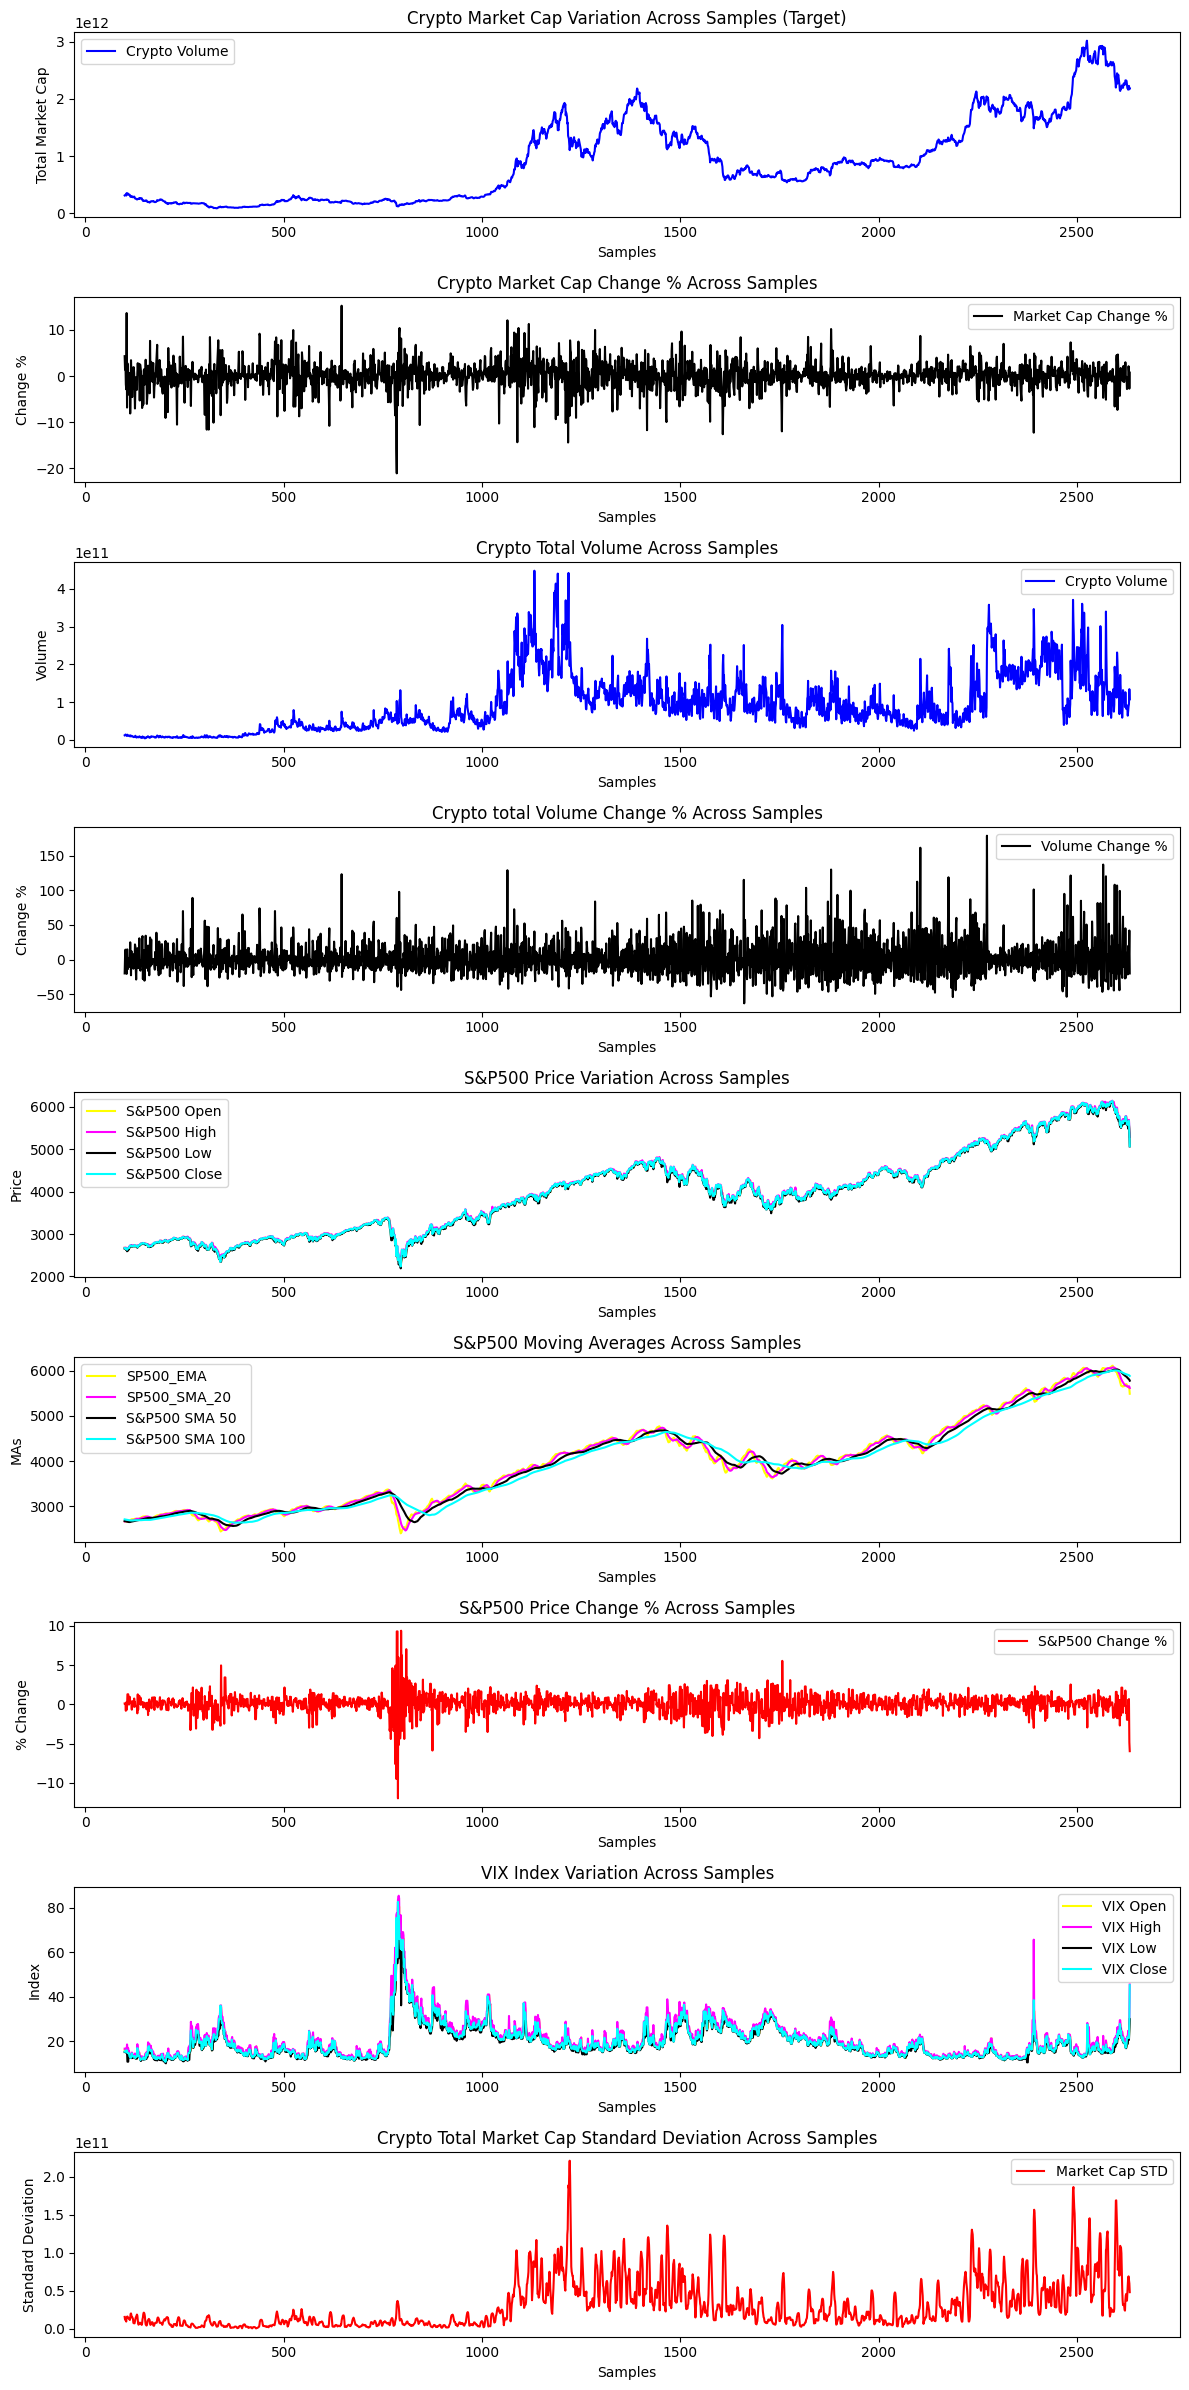

In [78]:
fig, axes = plt.subplots(9, 1, figsize=(12, 24)) 

# First plot: Crypto Total Market Cap (Our Target)
axes[0].plot(main_df.index, main_df['Crypto_Market_Cap'], label='Crypto Volume', color='blue')
axes[0].set_title('Crypto Market Cap Variation Across Samples (Target)')
axes[0].set_xlabel('Samples')
axes[0].set_ylabel('Total Market Cap')
axes[0].legend()

# Second plot: Crypto Total Market % Change
axes[1].plot(main_df.index, main_df['Crypto_Market_Cap_%'], label='Market Cap Change %', color='black')
axes[1].set_title('Crypto Market Cap Change % Across Samples')
axes[1].set_xlabel('Samples')
axes[1].set_ylabel('Change %')
axes[1].legend()

# Third plot: Crypto Total Volume
axes[2].plot(main_df.index, main_df['Crypto_Volume'], label='Crypto Volume', color='blue')
axes[2].set_title('Crypto Total Volume Across Samples')
axes[2].set_xlabel('Samples')
axes[2].set_ylabel('Volume')
axes[2].legend()

# Fourth plot: Crypto Total Volume % Change
axes[3].plot(main_df.index, main_df['Crypto_Volume_Change_%'], label='Volume Change %', color='black')
axes[3].set_title('Crypto total Volume Change % Across Samples')
axes[3].set_xlabel('Samples')
axes[3].set_ylabel('Change %')
axes[3].legend()

# Fifth plot: S&P500 Prices
axes[4].plot(main_df.index, main_df['S&P500_Open'], label='S&P500 Open', color='yellow')
axes[4].plot(main_df.index, main_df['S&P500_High'], label='S&P500 High', color='magenta')
axes[4].plot(main_df.index, main_df['S&P500_Low'], label='S&P500 Low', color='black')
axes[4].plot(main_df.index, main_df['S&P500_Close'], label='S&P500 Close', color='cyan')
axes[4].set_title('S&P500 Price Variation Across Samples')
axes[4].set_xlabel('Samples')
axes[4].set_ylabel('Price')
axes[4].legend()

# Sixth plot: S&P500 Prices
axes[5].plot(main_df.index, main_df['SP500_EMA'], label='SP500_EMA', color='yellow')
axes[5].plot(main_df.index, main_df['SP500_SMA_20'], label='SP500_SMA_20', color='magenta')
axes[5].plot(main_df.index, main_df['SP500_SMA_50'], label='S&P500 SMA 50', color='black')
axes[5].plot(main_df.index, main_df['SP500_SMA_100'], label='S&P500 SMA 100', color='cyan')
axes[5].set_title('S&P500 Moving Averages Across Samples')
axes[5].set_xlabel('Samples')
axes[5].set_ylabel('MAs')
axes[5].legend()

# Seventh plot: S&P500 % Change
axes[6].plot(main_df.index, main_df['S&P500_Change_%'], label='S&P500 Change %', color='red')
axes[6].set_title('S&P500 Price Change % Across Samples')
axes[6].set_xlabel('Samples')
axes[6].set_ylabel('% Change')
axes[6].legend()

# Eigth plot: VIX Prices
axes[7].plot(main_df.index, main_df['VIX_Open'], label='VIX Open', color='yellow')
axes[7].plot(main_df.index, main_df['VIX_High'], label='VIX High', color='magenta')
axes[7].plot(main_df.index, main_df['VIX_Low'], label='VIX Low', color='black')
axes[7].plot(main_df.index, main_df['VIX_Close'], label='VIX Close', color='cyan')
axes[7].set_title('VIX Index Variation Across Samples')
axes[7].set_xlabel('Samples')
axes[7].set_ylabel('Index')
axes[7].legend()

# Ninth plot: Crypto Total Market Cap Standard Deviation
axes[8].plot(main_df.index, main_df['Market_Cap_STD'], label='Market Cap STD', color='red')
axes[8].set_title('Crypto Total Market Cap Standard Deviation Across Samples')
axes[8].set_xlabel('Samples')
axes[8].set_ylabel('Standard Deviation')
axes[8].legend()

plt.tight_layout()
plt.show()


Additionally, discvering the corelations between variables is also a crucial step. By running the code below, we can see what features are most correlated to out target feature.

**Side note**: Here I decided to use **Spearman correlation** because it is better for predicting crypto market cap changes based on S&P 500. It measures the monotonic relationship between variables rather than assuming a strictly linear one like **Pearson**. Since financial markets often exhibit non-linear dependencies, where crypto and S&P 500 might move in the same general direction but not at a constant rate, Spearman is more robust in capturing such patterns. Additionally, it is less sensitive to outliers, which is crucial in volatile markets like cryptocurrency.

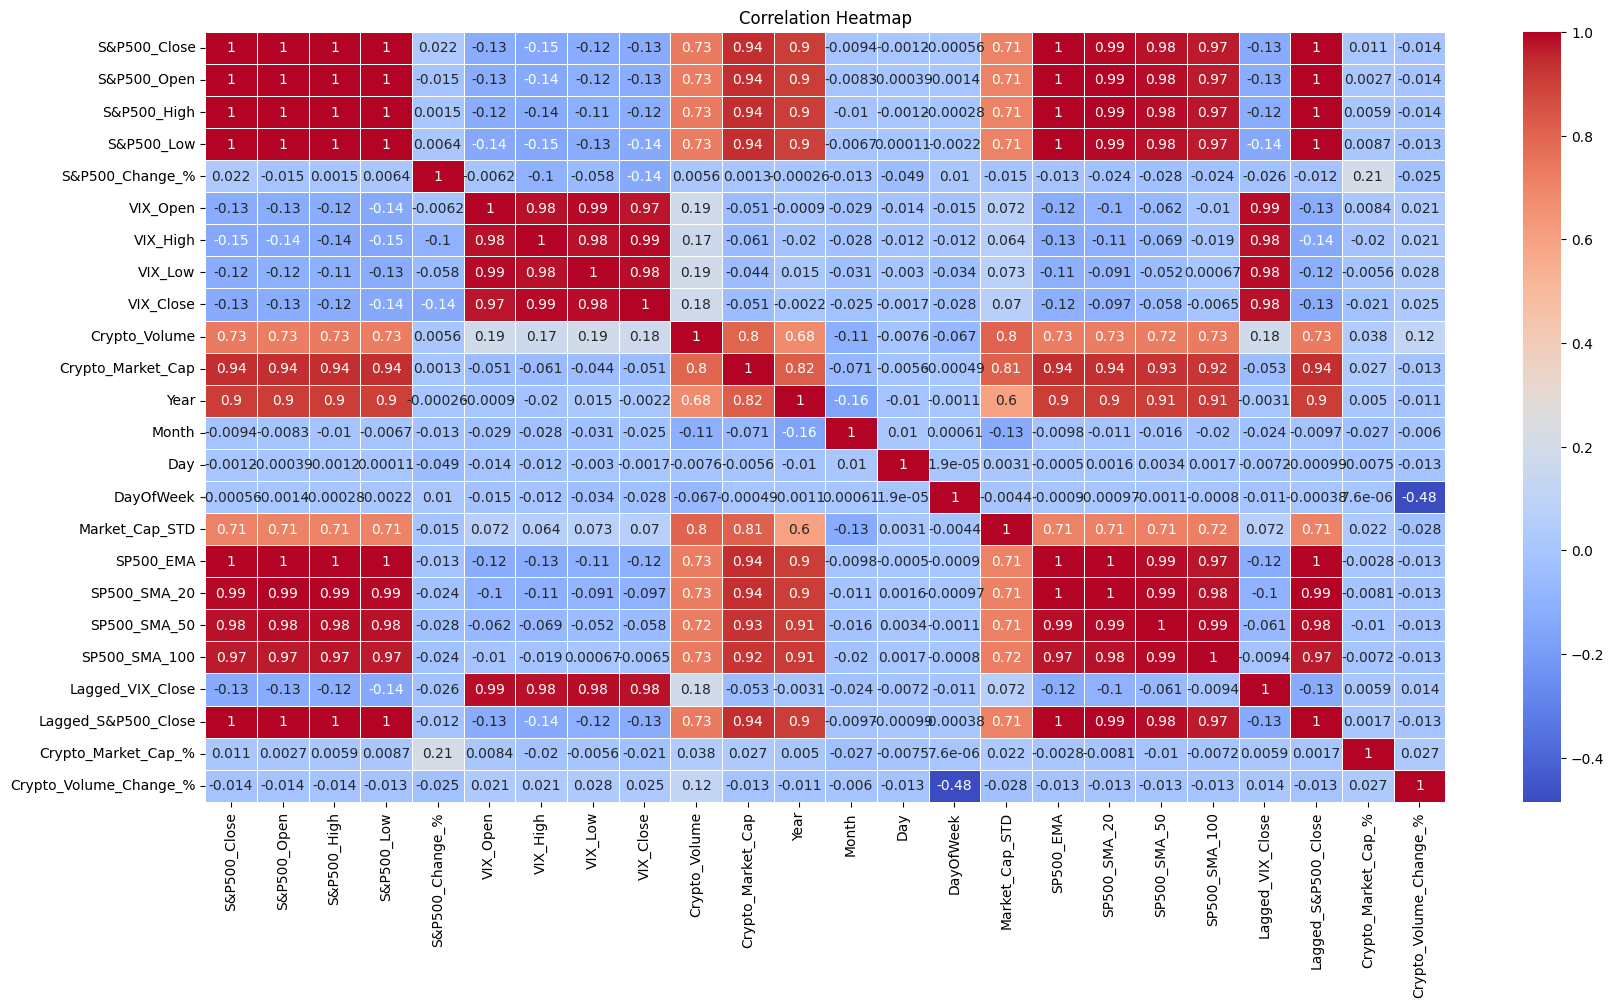

Crypto_Market_Cap         1.000000
S&P500_High               0.938559
S&P500_Close              0.938555
S&P500_Open               0.938501
Lagged_S&P500_Close       0.938486
SP500_EMA                 0.938408
S&P500_Low                0.938342
SP500_SMA_20              0.935829
SP500_SMA_50              0.928754
SP500_SMA_100             0.920803
Year                      0.821114
Market_Cap_STD            0.812101
Crypto_Volume             0.802779
Crypto_Market_Cap_%       0.026623
S&P500_Change_%           0.001327
DayOfWeek                -0.000486
Day                      -0.005637
Crypto_Volume_Change_%   -0.012778
VIX_Low                  -0.044062
VIX_Close                -0.051162
VIX_Open                 -0.051226
Lagged_VIX_Close         -0.052737
VIX_High                 -0.060779
Month                    -0.070776
Name: Crypto_Market_Cap, dtype: float64

In [79]:
df_numeric = main_df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 10))
sns.heatmap(df_numeric.corr("spearman"), linewidths=0.5, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

df_numeric.corr("spearman")["Crypto_Market_Cap"].sort_values(ascending = False)

Even though some features are much more important than the others, I have decided to keep them for experimentation purposes.  
*Note*: Removing the less important features did not make much difference.

#### **Data Splitting**

Let us prepare splitting the data and standardizing it to train our models by running the code below.

In [80]:
def split_time_series(df: pd.DataFrame, target_col: str, train_ratio: float) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.Series, pd.Series, pd.Series]:
    """
    Splits the time series dataset into train, validation, and test sets in a sequential manner.

    Args:
        df (pd.DataFrame): The input DataFrame (sorted by date).
        target_col (str): The name of the target column.
        train_ratio (float): The proportion of data to allocate for training (e.g., 0.8 means 80% for train, 10% for validation, 10% for test).

    Returns:
        tuple: DataFrames and Series for train, validation, and test sets (X_train, X_val, X_test, y_train, y_val, y_test).
    """
    # Ensure the data is sorted by time
    df = df.sort_values(by="Date")

    if not (0 < train_ratio < 1):
        raise ValueError("train_ratio must be between 0 and 1.")

    # Define split indices
    train_size = int(len(df) * train_ratio)
    val_size = int(len(df) * ((1 - train_ratio) / 2))

    # Sequential split
    train_data = df.iloc[:train_size]
    val_data = df.iloc[train_size:train_size + val_size]
    test_data = df.iloc[train_size + val_size:]

    # Extract features and target
    X_train, y_train = train_data.drop(columns=[target_col, "Date"]), train_data[target_col]
    X_val, y_val = val_data.drop(columns=[target_col, "Date"]), val_data[target_col]
    X_test, y_test = test_data.drop(columns=[target_col, "Date"]), test_data[target_col]

    return X_train, X_val, X_test, y_train, y_val, y_test


In [81]:
X_train, X_val, X_test, y_train, y_val, y_test = split_time_series(main_df, 'Crypto_Market_Cap', train_ratio=0.70)

feature_scaler = StandardScaler()
target_scaler = StandardScaler()

X_train = feature_scaler.fit_transform(X_train)
X_val = feature_scaler.transform(X_val)
X_test = feature_scaler.transform(X_test)

y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = target_scaler.transform(y_val.values.reshape(-1, 1))
y_test = target_scaler.transform(y_test.values.reshape(-1, 1))

print("Train shapes:", X_train.shape, y_train.shape)
print("Validation shapes:", X_val.shape, y_val.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (1774, 24) (1774, 1)
Validation shapes: (380, 24) (380, 1)
Test shapes: (381, 24) (381, 1)


### **Model Training**

#### **Utils**

These are a couple of helper functions, and variables that will help us asses our models!

In [82]:
TRAIN_SIZE = len(X_train)
VAL_SIZE = len(X_val)
TEST_SIZE = len(X_test)
TRAIN_INDICES = main_df.index[:TRAIN_SIZE]
VAL_INDICES = main_df.index[TRAIN_SIZE : TRAIN_SIZE + VAL_SIZE]
TEST_INDICES = main_df.index[TRAIN_SIZE + VAL_SIZE:]

def mean_directional_accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Calculates Mean Directional Accuracy (MDA).
    
    Args:
        y_true (np.ndarray): Actual target values.
        y_pred (np.ndarray): Predicted target values.
    
    Returns:
        float: MDA score between 0 and 1.
    """
    return np.mean(np.sign(np.diff(y_true.flatten())) == np.sign(np.diff(y_pred.flatten())))

def evaluate_model(y_true: np.ndarray, y_pred: np.ndarray) -> dict[str, float]:
    """
    Evaluates the model on different metrics.
    
    Args:
        y_true (np.ndarray): Actual target values.
        y_pred (np.ndarray): Predicted target values.
    
    Returns:
        dict: Dictionary of metric names and their values.
    """

    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R²": r2_score(y_true, y_pred),
        "MDA": mean_directional_accuracy(y_true, y_pred)
    }

def print_combined_evaluation_metrics(
    train_results: dict[str, float],
    val_results: dict[str, float],
    test_results: dict[str, float]
) -> None:
    """
    Prints evaluation metrics for train, validation, and test sets in a horizontal format.
    
    Args:
        train_results (dict): Training set metrics.
        val_results (dict): Validation set metrics.
        test_results (dict): Test set metrics.
    """
    print("=" * 75)
    print("📊 Model Evaluation Results (    Train   |   Validation  |   Test    ) 📊")
    print("=" * 75)
    
    all_metrics = sorted(set(train_results) | set(val_results) | set(test_results))
    for metric in all_metrics:
        train_val = train_results.get(metric, float('nan'))
        val_val = val_results.get(metric, float('nan'))
        test_val = test_results.get(metric, float('nan'))
        print(f"➡️ {metric:<24} {train_val:>11.4f}  {val_val:>12.4f}  {test_val:>11.4f}")
    
    print("=" * 75)

def plot_predictions(
    y_true: np.ndarray,
    y_pred: np.ndarray,
    indices: pd.Index,
    title: str
) -> None:
    """
    Plots true vs predicted values.
    
    Args:
        y_true (np.ndarray): Actual target values.
        y_pred (np.ndarray): Predicted target values.
        indices (pd.Index): Indices for the samples.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(10, 4))
    plt.plot(indices, y_true, label='True Values', color='blue')
    plt.plot(indices, y_pred, label='Predicted Values', color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Scaled Market Cap')
    plt.legend()
    plt.show()

def plot_loss_curves(train_losses: list, val_losses: list) -> None:
    """
    Plots training and validation loss curves.
    
    Args:
        train_losses (list): List of training losses per epoch
        val_losses (list): List of validation losses per epoch
    """
    plt.figure(figsize=(10, 4))
    plt.plot(train_losses, label='Training Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()

Side note about metrics:
- **MSE/RMSE**: Values closer to 0 indicates higher accuracy.
- **R²**: A score closer to 1 is ideal, meaning the model fits the data well. A negative value indicates poor predictive performance.
- **MDA**: A score above 0.5 suggests better-than-random prediction, while a score close to 1 is ideal.  

Let us define a modular train_model function that we can use in many ways (batching, dropout, etc.)

In [83]:
def train_model(
    model: nn.Module,
    criterion: nn.Module,
    optimizer: optim.Optimizer,
    X_train: torch.Tensor,
    y_train: torch.Tensor,
    X_val: torch.Tensor,
    y_val: torch.Tensor,
    epochs: int = 250,
    batch_size: int = None,
    dropout_rate: float = 0.0,
    print_every: int = 50
) -> tuple[list, list]:
    """Trains the model and returns loss histories.
    
    Args:
        model: Neural network model
        criterion: Loss function
        optimizer: Optimization algorithm
        X_train: Training features
        y_train: Training labels
        X_val: Validation features
        y_val: Validation labels
        epochs: Number of training epochs
        batch_size: Size of training batches (None for full batch)
        dropout_rate: Dropout rate (0.0 for no dropout)
        print_every: Print progress every N epochs
        
    Returns:
        Tuple of (train_losses, val_losses)
    """
    train_losses, val_losses = [], []
    
    # Set dropout rate if model has dropout layers
    if hasattr(model, 'dropout_rate'):
        model.dropout_rate = dropout_rate
    
    # Create DataLoader if batch_size is specified
    if batch_size is not None:
        train_dataset = TensorDataset(X_train, y_train)
        train_loader = DataLoader(train_dataset, batch_size=batch_size)
    else:
        # If no batch_size, use full dataset as single batch
        train_loader = [(X_train, y_train)]
    
    for epoch in range(epochs):
        epoch_train_loss = 0.0
        batch_count = 0
        
        # Training step with potential batching
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            
            epoch_train_loss += loss.item()
            batch_count += 1
        
        avg_train_loss = epoch_train_loss / batch_count
        
        # Validation step (always full batch)
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
        
        # Store losses
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss.item())
        
        if (epoch + 1) % print_every == 0:
            print(f"Epoch [{epoch+1}/{epochs}] ==> Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss.item():.4f}")
    
    return train_losses, val_losses

Also define some common variables and hyperparameters that may be overwritten.

In [84]:
#hyperparameters
input_size = X_train.shape[1]
num_layers = 2                
hidden_size = 32
batch_size = 64
dropout_rate = 0.2
lr = 0.01

# Tensor conversion for training
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

Since we are dealing with hyperparameters, using grid search would be useful for finding the best hyperparameters for each model.
However, the training of the models in this project is pretty fast. Even with some extensive hyperparameters configuration, the longest train time was around 30 minutes. Thus, I will not be implementing grid search.

#### **Linear Regression**

Let us start first with a very simple model and see how it performs. Then we can go from there. 

In [85]:
class LinearRegressionModel(nn.Module):
    """
    A simple linear regression model with optional dropout and batch normalization.

    This model takes input features and outputs a single predicted value per sample. 
    It is implemented using PyTorch and supports optional regularization using 
    dropout and optional normalization using batch normalization.

    Args:
        input_dim (int): Number of input features.
        dropout_rate (float, optional): Dropout rate for regularization (default is 0.0, i.e., no dropout).
        use_batchnorm (bool, optional): Whether to apply batch normalization (default is False).

    Returns:
        torch.Tensor: Predicted value(s) of shape (batch_size, 1).

    Example:
        >>> model = LinearRegressionModel(input_dim=5, dropout_rate=0.1, use_batchnorm=True)
        >>> inputs = torch.randn(10, 5)  # 10 samples, 5 features each
        >>> outputs = model(inputs)
    """

    def __init__(self, input_dim: int, dropout_rate: float = 0.0, use_batchnorm: bool = False):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.dropout = nn.Dropout(dropout_rate) if dropout_rate > 0 else None
        self.batchnorm = nn.BatchNorm1d(1) if use_batchnorm else None

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the model.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, input_dim)

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, 1)
        """
        x = self.linear(x)
        if self.batchnorm is not None:
            x = self.batchnorm(x)
        if self.dropout is not None:
            x = self.dropout(x)
        return x


Epoch [50/250] ==> Train Loss: 0.0985, Val Loss: 0.0527
Epoch [100/250] ==> Train Loss: 0.0842, Val Loss: 0.0893
Epoch [150/250] ==> Train Loss: 0.0813, Val Loss: 0.1180
Epoch [200/250] ==> Train Loss: 0.0803, Val Loss: 0.1300
Epoch [250/250] ==> Train Loss: 0.0800, Val Loss: 0.1359
📊 Model Evaluation Results (    Train   |   Validation  |   Test    ) 📊
➡️ MDA                           0.6204        0.5831       0.5500
➡️ MSE                           0.0799        0.1359       0.3445
➡️ RMSE                          0.2827        0.3686       0.5870
➡️ R²                            0.9201        0.5349       0.4112


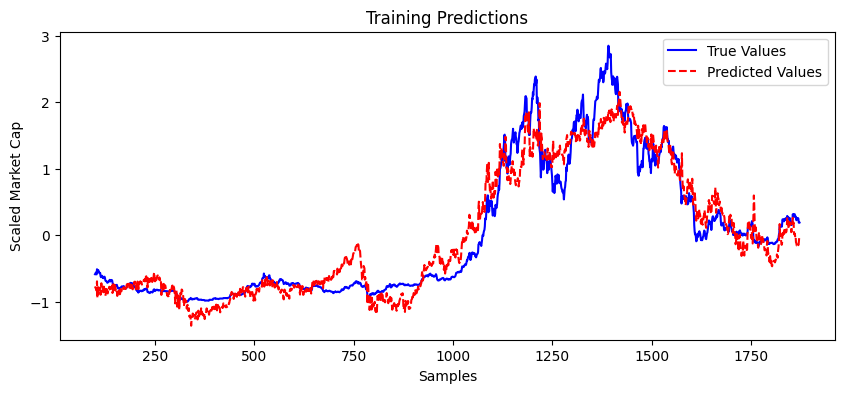

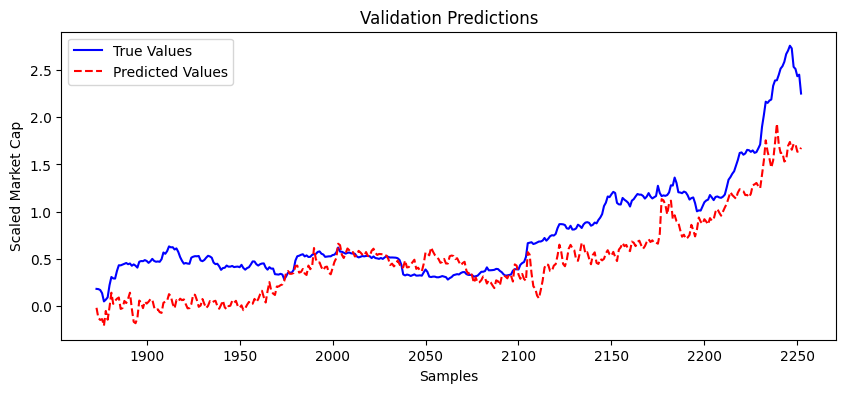

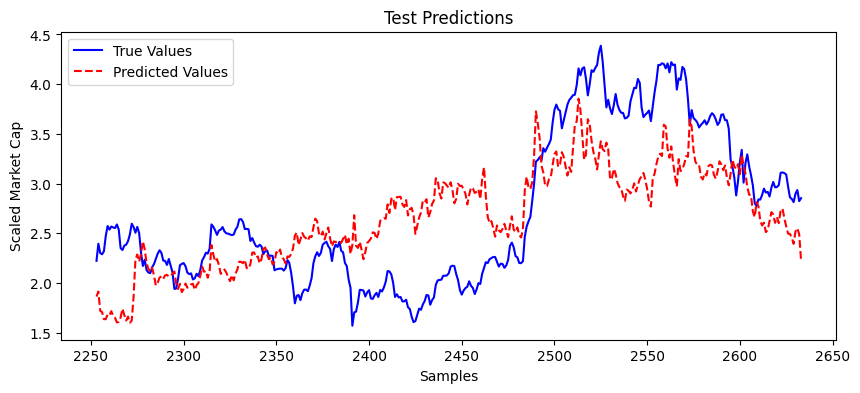

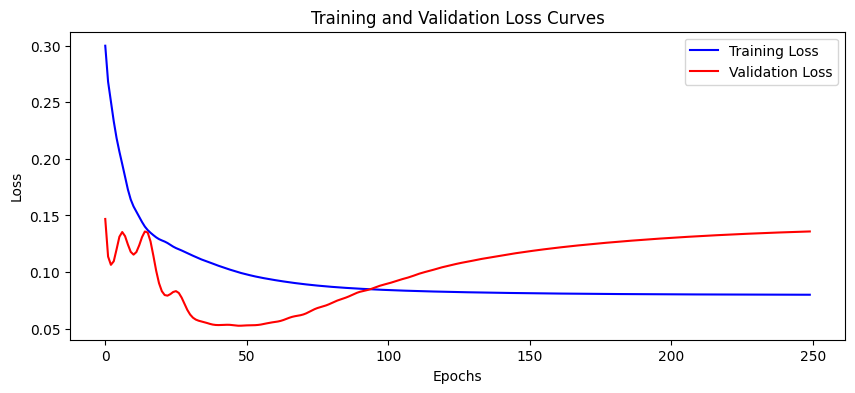

In [86]:
# 1. Initialize model
lin_reg_model = LinearRegressionModel(input_dim=input_size)

# 2. Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lin_reg_model.parameters(), lr=lr)

# 3. Train the model
train_losses, val_losses = train_model(
    model=lin_reg_model,
    criterion=criterion,
    optimizer=optimizer,
    X_train=X_train_tensor,
    y_train=y_train_tensor,
    X_val=X_val_tensor,
    y_val=y_val_tensor,
)

# 4. Evaluate the model on train, validation, and test sets
lin_reg_model.eval()
with torch.no_grad():
    train_pred = lin_reg_model(X_train_tensor)
    val_pred = lin_reg_model(X_val_tensor)
    test_pred = lin_reg_model(X_test_tensor)
    
    train_metrics = evaluate_model(y_train_tensor.detach().numpy(), train_pred)
    val_metrics = evaluate_model(y_val_tensor.detach().numpy(), val_pred)
    test_metrics = evaluate_model(y_test_tensor.detach().numpy(), test_pred)

# 5. Print metric results
print_combined_evaluation_metrics(train_metrics, val_metrics, test_metrics)

# 6. Plot predictions and loss curves
plot_predictions(y_train, train_pred, TRAIN_INDICES, "Training Predictions")
plot_predictions(y_val, val_pred, VAL_INDICES, "Validation Predictions")
plot_predictions(y_test, test_pred, TEST_INDICES, "Test Predictions")
plot_loss_curves(train_losses, val_losses)

The previous model performed suprisingly better than expected.  
Even if it is not common in linear regressor models, let us try to explore it with some batching.

Epoch [50/150] ==> Train Loss: 0.8254, Val Loss: 0.1098
Epoch [100/150] ==> Train Loss: 0.8166, Val Loss: 0.0713
Epoch [150/150] ==> Train Loss: 0.8109, Val Loss: 0.1536
📊 Model Evaluation Results (    Train   |   Validation  |   Test    ) 📊
➡️ MDA                           0.6441        0.6069       0.5579
➡️ MSE                           0.1200        0.1536       0.6972
➡️ RMSE                          0.3464        0.3919       0.8350
➡️ R²                            0.8800        0.4741      -0.1915


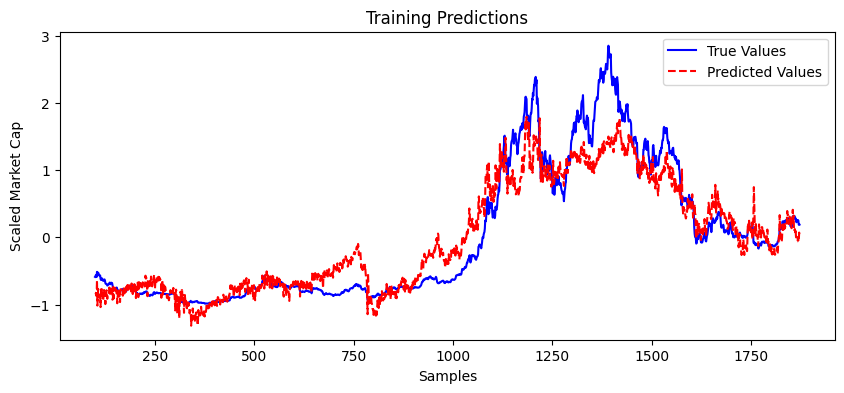

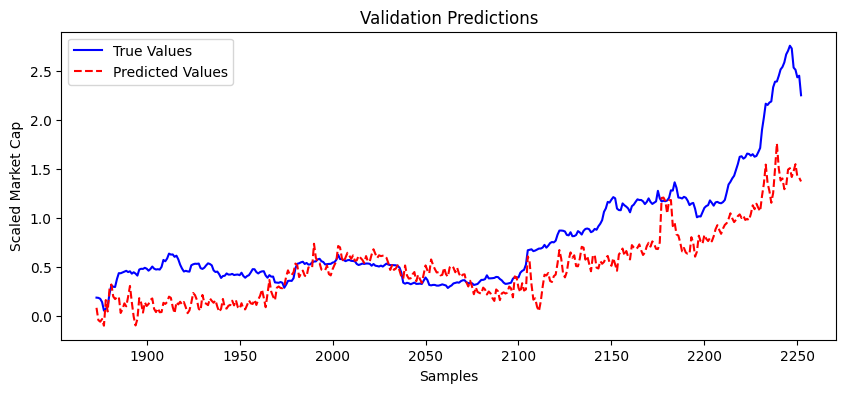

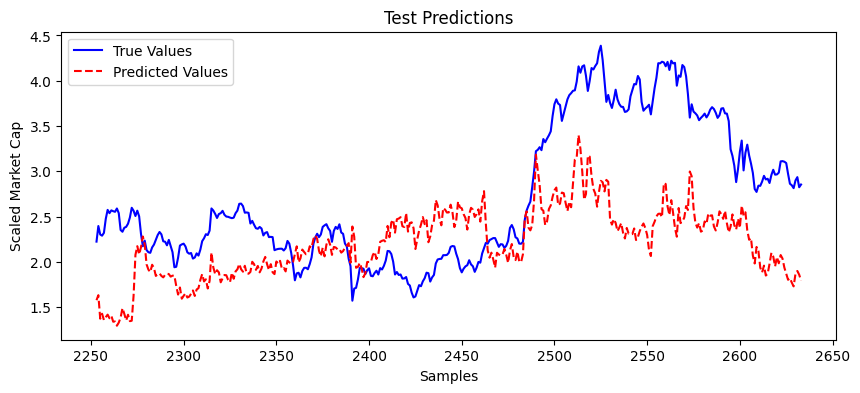

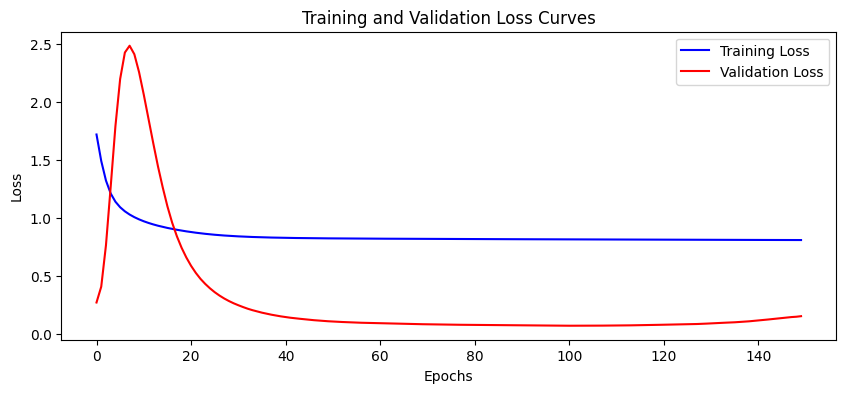

In [87]:
# 1. Initialize model
lin_reg_model = LinearRegressionModel(input_dim=input_size, use_batchnorm=True, dropout_rate=0.0) 

# 2. Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lin_reg_model.parameters(), lr=lr)

# 3. Train the model
train_losses, val_losses = train_model(
    model=lin_reg_model,
    criterion=criterion,
    optimizer=optimizer,
    X_train=X_train_tensor,
    y_train=y_train_tensor,
    X_val=X_val_tensor,
    y_val=y_val_tensor,
    batch_size=1024,
    epochs=150
    )

# 4. Evaluate the model on train, validation, and test sets
lin_reg_model.eval()
with torch.no_grad():
    train_pred = lin_reg_model(X_train_tensor)
    val_pred = lin_reg_model(X_val_tensor)
    test_pred = lin_reg_model(X_test_tensor)
    
    train_metrics = evaluate_model(y_train_tensor.detach().numpy(), train_pred)
    val_metrics = evaluate_model(y_val_tensor.detach().numpy(), val_pred)
    test_metrics = evaluate_model(y_test_tensor.detach().numpy(), test_pred)

# 5. Print metric results
print_combined_evaluation_metrics(train_metrics, val_metrics, test_metrics)

# 6. Plot predictions and loss curves
plot_predictions(y_train, train_pred, TRAIN_INDICES, "Training Predictions")
plot_predictions(y_val, val_pred, VAL_INDICES, "Validation Predictions")
plot_predictions(y_test, test_pred, TEST_INDICES, "Test Predictions")
plot_loss_curves(train_losses, val_losses)

#### **ANNs**

Let us move on to a more complex model: **ANNs**  
Run the cell below for some additional helper functions.

In [88]:
class ANNModel(nn.Module):
    """
    A simple artificial neural network (ANN) model with two hidden layers,
    optional dropout, and batch normalization.

    Args:
        input_size (int): Number of input features.
        output_size (int, optional): Number of output units (default is 1).
        dropout_rate (float, optional): Dropout rate between layers (default is None, i.e., no dropout).
        use_batchnorm (bool, optional): Whether to apply batch normalization (default is False).

    Returns:
        torch.Tensor: Output tensor of shape (batch_size, output_size)

    Example:
        >>> model = ANNModel(input_size=10, output_size=1, dropout_rate=0.2, use_batchnorm=True)
        >>> x = torch.randn(32, 10)  # 32 samples, 10 features each
        >>> output = model(x)
    """

    def __init__(
        self, 
        input_size: int, 
        output_size: int = 1, 
        dropout_rate: float = None,
        use_batchnorm: bool = False
    ) -> None:
        super().__init__()
        self.dropout_rate = dropout_rate
        self.use_batchnorm = use_batchnorm
        
        layers = []
        
        # Input -> Hidden 1
        layers.append(nn.Linear(input_size, 16))
        if self.use_batchnorm:
            layers.append(nn.BatchNorm1d(16)) 
        layers.append(nn.ReLU())
        if dropout_rate is not None:
            layers.append(nn.Dropout(dropout_rate))
        
        # Hidden 1 -> Hidden 2
        layers.append(nn.Linear(16, 8))
        if self.use_batchnorm:
            layers.append(nn.BatchNorm1d(8))
        layers.append(nn.ReLU())
        if dropout_rate is not None:
            layers.append(nn.Dropout(dropout_rate))
        
        # Hidden 2 -> Output
        layers.append(nn.Linear(8, output_size))
        
        self.model = nn.Sequential(*layers)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Defines the forward pass of the ANN model.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, input_size)

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, output_size)
        """
        return self.model(x)


Let us train our second model with the simplest hyperparameters!

Epoch [50/250] ==> Train Loss: 0.6218, Val Loss: 0.3841
Epoch [100/250] ==> Train Loss: 0.1101, Val Loss: 0.6821
Epoch [150/250] ==> Train Loss: 0.0807, Val Loss: 0.4608
Epoch [200/250] ==> Train Loss: 0.0686, Val Loss: 0.3287
Epoch [250/250] ==> Train Loss: 0.0599, Val Loss: 0.2545
📊 Model Evaluation Results (    Train   |   Validation  |   Test    ) 📊
➡️ MDA                           0.5883        0.6016       0.6000
➡️ MSE                           0.0597        0.2545       1.4147
➡️ RMSE                          0.2444        0.5044       1.1894
➡️ R²                            0.9403        0.1288      -1.4177


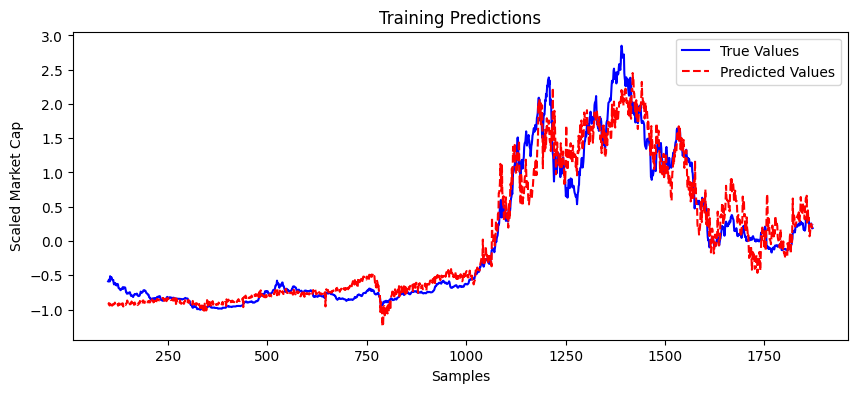

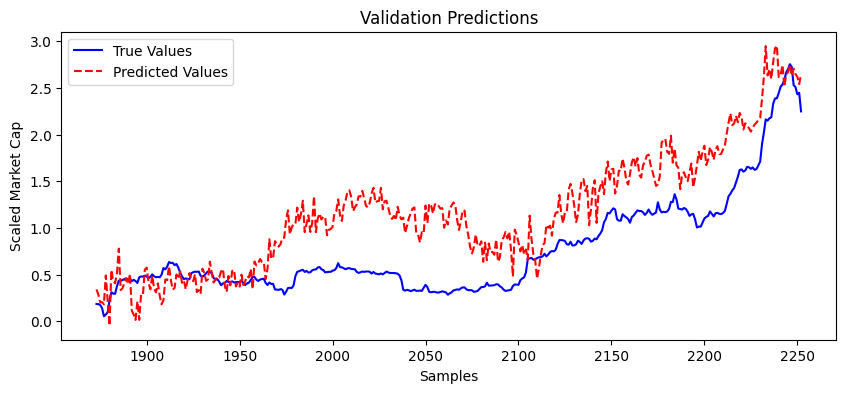

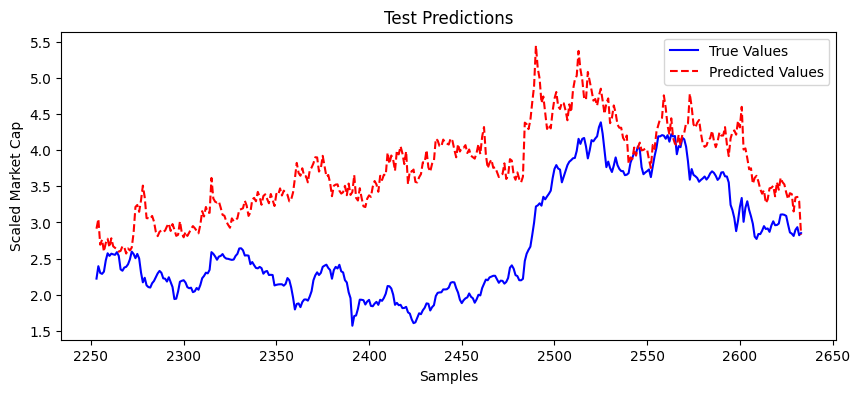

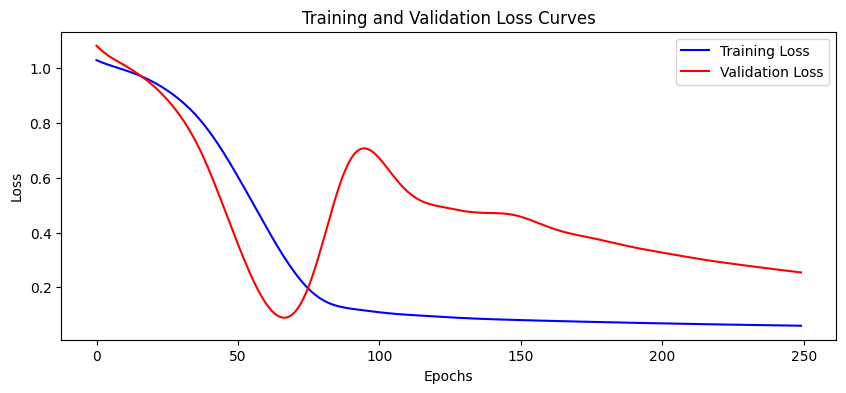

In [89]:
#1. Initialize model
ANN_model = ANNModel(input_size=input_size)

#2. Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(ANN_model.parameters(), lr=lr/10)

#3. Train the model
train_losses, val_losses = train_model(
    model=ANN_model,
    criterion=criterion, 
    optimizer=optimizer,
    X_train=X_train_tensor, 
    y_train=y_train_tensor,
    X_val=X_val_tensor,
    y_val=y_val_tensor,
)

#4. Evaluate the model on train, validation, and test sets
ANN_model.eval()
with torch.no_grad():
    train_pred = ANN_model(X_train_tensor)
    val_pred = ANN_model(X_val_tensor)
    test_pred = ANN_model(X_test_tensor)
    
    train_metrics = evaluate_model(y_train_tensor.detach().numpy(), train_pred)
    val_metrics = evaluate_model(y_val_tensor.detach().numpy(), val_pred)
    test_metrics = evaluate_model(y_test_tensor.detach().numpy(), test_pred)

#5. Print metric results
print_combined_evaluation_metrics(train_metrics, val_metrics, test_metrics)

#6. Plot predictions and loss curves
plot_predictions(y_train, train_pred, TRAIN_INDICES, "Training Predictions")
plot_predictions(y_val, val_pred, VAL_INDICES, "Validation Predictions")
plot_predictions(y_test, test_pred, TEST_INDICES, "Test Predictions")
plot_loss_curves(train_losses, val_losses)

Let's train our third model with some batch size, batch normalization and dropout rate.

Epoch [50/200] ==> Train Loss: 0.3360, Val Loss: 0.2246
Epoch [100/200] ==> Train Loss: 0.2414, Val Loss: 0.1881
Epoch [150/200] ==> Train Loss: 0.2024, Val Loss: 0.1239
Epoch [200/200] ==> Train Loss: 0.1841, Val Loss: 0.0900
📊 Model Evaluation Results (    Train   |   Validation  |   Test    ) 📊
➡️ MDA                           0.5381        0.5277       0.5579
➡️ MSE                           0.0726        0.0900       0.4217
➡️ RMSE                          0.2694        0.3000       0.6494
➡️ R²                            0.9274        0.6918       0.2792


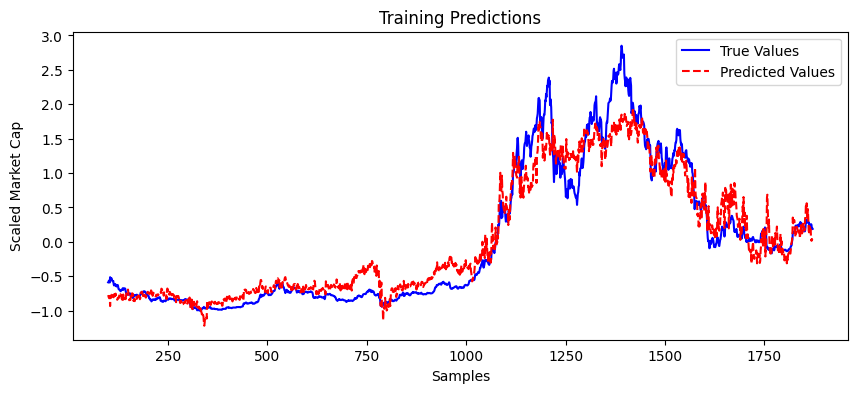

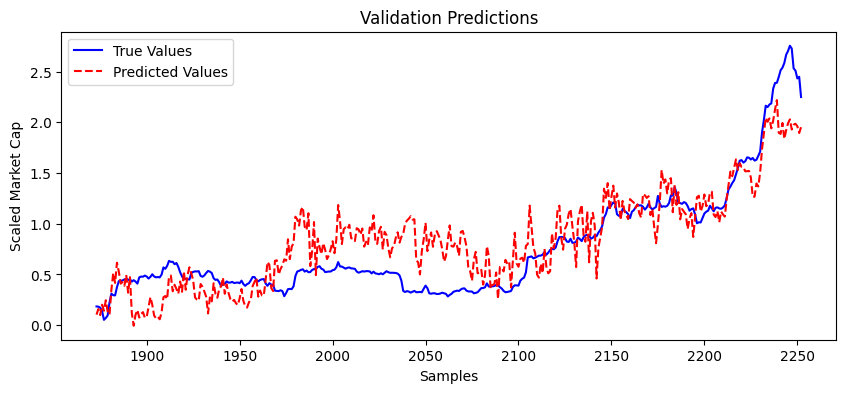

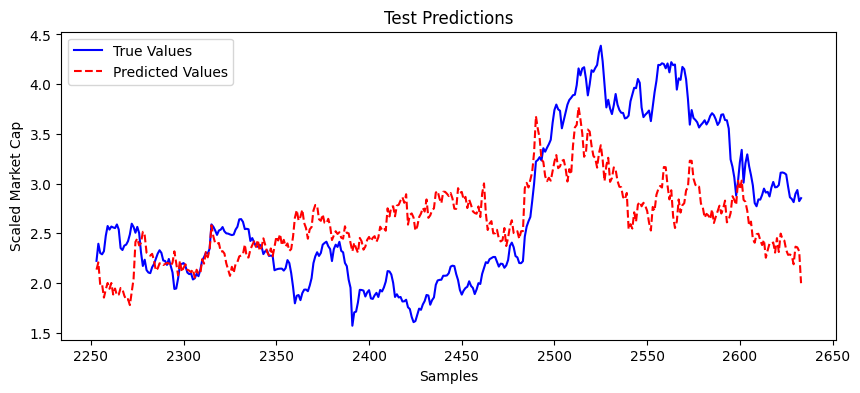

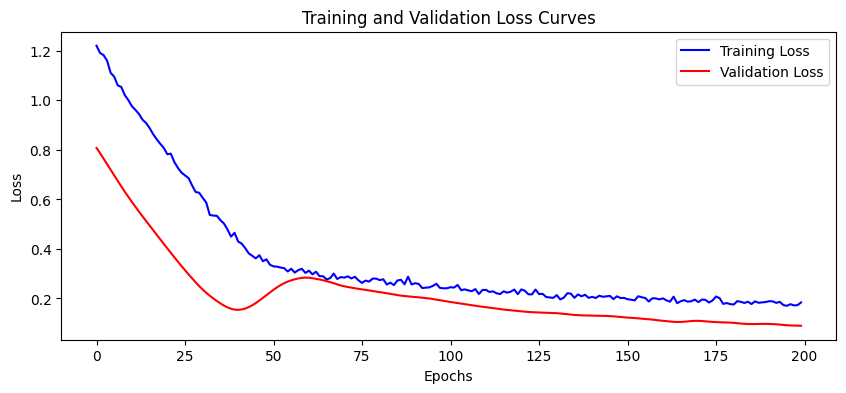

In [90]:
#1. Initialize model
ANN_model = ANNModel(input_size=input_size, dropout_rate=0.2, use_batchnorm=False)

#2. Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(ANN_model.parameters(), lr=lr/10)

#3. Train the model
train_losses, val_losses = train_model(
    model=ANN_model,
    criterion=criterion, 
    optimizer=optimizer,
    X_train=X_train_tensor,
    y_train=y_train_tensor,
    X_val=X_val_tensor, 
    y_val=y_val_tensor,
    batch_size=1024,
    epochs=200
)

#4. Evaluate the model on train, validation, and test sets
ANN_model.eval()
with torch.no_grad():
    train_pred = ANN_model(X_train_tensor)
    val_pred = ANN_model(X_val_tensor)
    test_pred = ANN_model(X_test_tensor)
    
    train_metrics = evaluate_model(y_train_tensor.detach().numpy(), train_pred)
    val_metrics = evaluate_model(y_val_tensor.detach().numpy(), val_pred)
    test_metrics = evaluate_model(y_test_tensor.detach().numpy(), test_pred)

#5. Print metric results
print_combined_evaluation_metrics(train_metrics, val_metrics, test_metrics)

#6. Plot predictions and loss curves
plot_predictions(y_train, train_pred, TRAIN_INDICES, "Training Predictions")
plot_predictions(y_val, val_pred, VAL_INDICES, "Validation Predictions")
plot_predictions(y_test, test_pred, TEST_INDICES, "Test Predictions")
plot_loss_curves(train_losses, val_losses)

#### **RNNs**

Let us now test RNN models such that LSTMs and GRUs.

##### LSTM

In [91]:
class LSTMModel(nn.Module):
    """
    A PyTorch LSTM-based model for sequence prediction tasks.

    This model processes time-series or sequential input using one or more
    LSTM layers, with optional dropout and layer normalization, followed by
    a fully connected output layer.

    Args:
        input_size (int): Number of input features per time step.
        hidden_size (int): Number of features in the hidden state.
        num_layers (int): Number of stacked LSTM layers.
        output_size (int, optional): Size of the final output. Default is 1.
        dropout (float, optional): Dropout probability between LSTM layers. Default is 0.0 (no dropout).
        use_layernorm (bool, optional): Whether to apply LayerNorm to LSTM output. Default is False.

    Returns:
        torch.Tensor: Output tensor of shape (batch_size, output_size)

    Example:
        >>> model = LSTMModel(input_size=10, hidden_size=32, num_layers=2, output_size=1, dropout=0.2)
        >>> x = torch.randn(16, 30, 10)  # (batch_size=16, sequence_length=30, input_size=10)
        >>> output = model(x)
    """

    def __init__(
        self,
        input_size: int,
        hidden_size: int,
        num_layers: int,
        output_size: int = 1,
        dropout: float = 0.0,
        use_layernorm: bool = False
    ) -> None:
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.input_size = input_size
        self.output_size = output_size
        self.dropout = dropout
        self.use_layernorm = use_layernorm

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if dropout > 0 else 0.0 
        )

        if self.use_layernorm:
            self.layernorm = nn.LayerNorm(hidden_size)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the LSTM model.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, sequence_length, input_size)

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, output_size)
        """
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))  # (batch, seq_len, hidden_size)

        if self.use_layernorm:
            out = self.layernorm(out[:, -1, :]) 
        else:
            out = out[:, -1, :]

        return self.fc(out)


Epoch [50/100] ==> Train Loss: 0.0465, Val Loss: 0.0827
Epoch [100/100] ==> Train Loss: 0.0368, Val Loss: 0.0799
📊 Model Evaluation Results (    Train   |   Validation  |   Test    ) 📊
➡️ MDA                           0.5815        0.6148       0.6474
➡️ MSE                           0.0367        0.0799       0.7893
➡️ RMSE                          0.1916        0.2827       0.8884
➡️ R²                            0.9633        0.7264      -0.3490


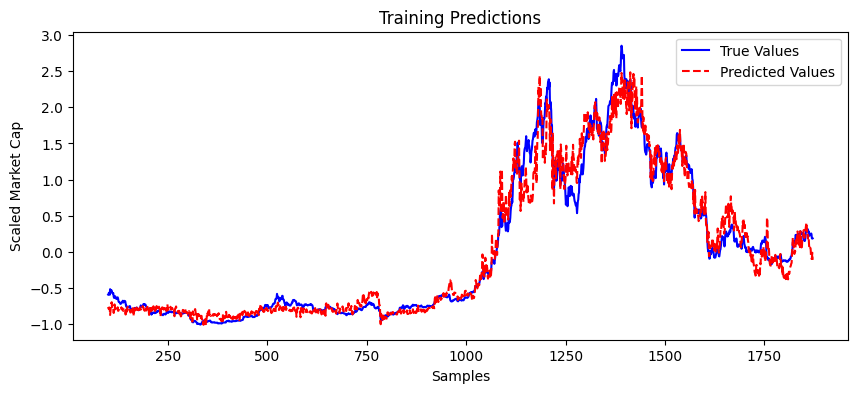

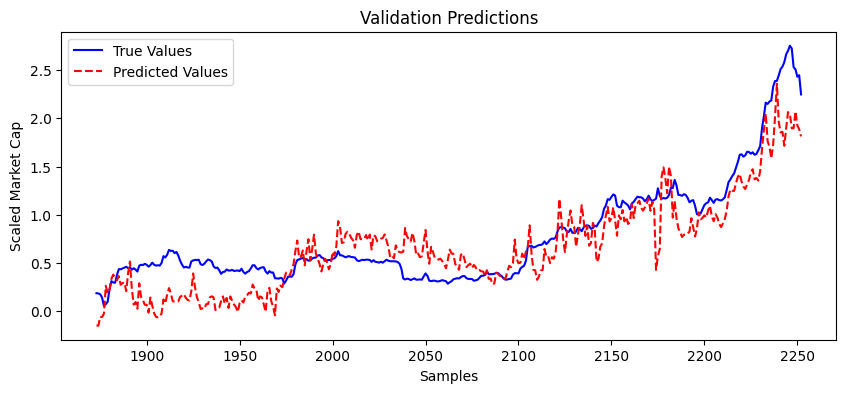

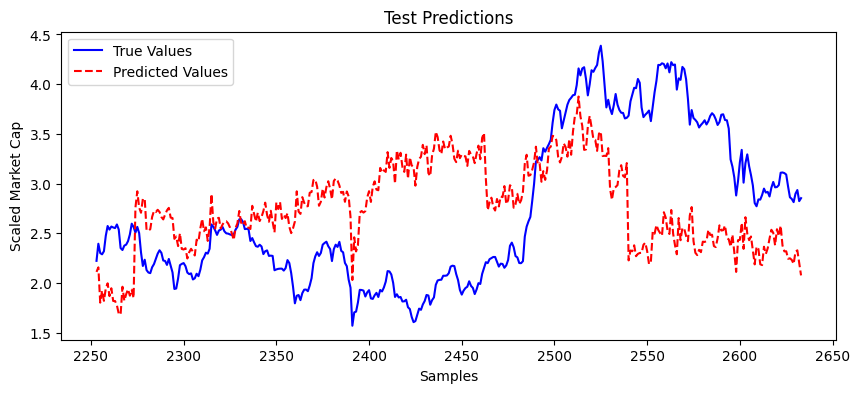

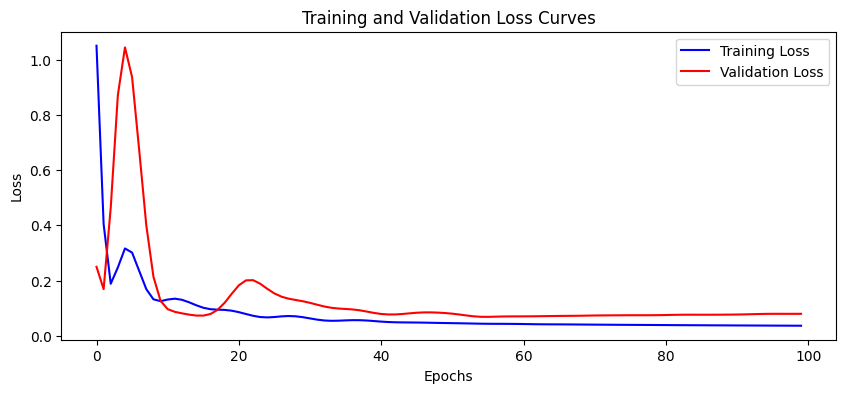

In [92]:
#1. Initialize model           
lstm_model = LSTMModel(input_size=input_size, hidden_size=128, num_layers=2, dropout=0.0, use_layernorm=True)

#2. Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=lr/10)

#3. Reshape data for LSTM (needs [batch, seq_len, features])
# Since we're doing single-step prediction, seq_len=1
X_train_tensor = X_train_tensor.unsqueeze(1)
X_val_tensor = X_val_tensor.unsqueeze(1)
X_test_tensor = X_test_tensor.unsqueeze(1)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)

#4. Train the model
train_losses, val_losses = train_model(
    model=lstm_model, 
    criterion=criterion, 
    optimizer=optimizer,
    X_train=X_train_tensor,
    y_train=y_train_tensor,
    X_val=X_val_tensor, 
    y_val=y_val_tensor,
    epochs=100
)

#5. Evaluate the model on train, validation, and test sets
lstm_model.eval()
with torch.no_grad():
    train_pred = lstm_model(X_train_tensor)
    val_pred = lstm_model(X_val_tensor)
    test_pred = lstm_model(X_test_tensor)
    
    train_metrics = evaluate_model(y_train_tensor.detach().numpy(), train_pred)
    val_metrics = evaluate_model(y_val_tensor.detach().numpy(), val_pred)
    test_metrics = evaluate_model(y_test_tensor.detach().numpy(), test_pred)

#6. Print metric results
print_combined_evaluation_metrics(train_metrics, val_metrics, test_metrics)

#7. Plot predictions and loss curves
plot_predictions(y_train, train_pred.squeeze().numpy(), TRAIN_INDICES, "Training Predictions")
plot_predictions(y_val, val_pred.squeeze().numpy(), VAL_INDICES, "Validation Predictions")
plot_predictions(y_test, test_pred.squeeze().numpy(), TEST_INDICES, "Test Predictions")
plot_loss_curves(train_losses, val_losses)

##### GRU

In [93]:
class GRUModel(nn.Module):
    """
    A PyTorch GRU-based model for sequence prediction tasks.

    This model uses a stack of GRU (Gated Recurrent Unit) layers to process
    sequential input data. It supports optional dropout and layer normalization,
    and outputs predictions through a fully connected layer based on the last
    time step's hidden state.

    Args:
        input_size (int): Number of input features per time step.
        hidden_size (int): Number of features in the GRU hidden state.
        num_layers (int): Number of stacked GRU layers.
        output_size (int, optional): Size of the final output. Default is 1.
        dropout (float, optional): Dropout probability between GRU layers. Default is 0.0 (no dropout).
        use_layernorm (bool, optional): Whether to apply LayerNorm to GRU output. Default is False.

    Returns:
        torch.Tensor: Output tensor of shape (batch_size, output_size)

    Example:
        >>> model = GRUModel(input_size=10, hidden_size=32, num_layers=2, output_size=1, dropout=0.1)
        >>> x = torch.randn(16, 30, 10)  # (batch_size=16, sequence_length=30, input_size=10)
        >>> output = model(x)
    """

    def __init__(
        self,
        input_size: int,
        hidden_size: int,
        num_layers: int,
        output_size: int = 1,
        dropout: float = 0.0,
        use_layernorm: bool = False
    ) -> None:
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.use_layernorm = use_layernorm

        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )

        if self.use_layernorm:
            self.layernorm = nn.LayerNorm(hidden_size)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the GRU model.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, sequence_length, input_size)

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, output_size)
        """
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.gru(x, h0)  # (batch_size, seq_len, hidden_size)

        if self.use_layernorm:
            out = self.layernorm(out[:, -1, :])  
        else:
            out = out[:, -1, :] 

        return self.fc(out)


Epoch [50/250] ==> Train Loss: 0.0910, Val Loss: 0.3775
Epoch [100/250] ==> Train Loss: 0.0642, Val Loss: 0.2506
Epoch [150/250] ==> Train Loss: 0.0521, Val Loss: 0.1765
Epoch [200/250] ==> Train Loss: 0.0439, Val Loss: 0.1293
Epoch [250/250] ==> Train Loss: 0.0394, Val Loss: 0.1003
📊 Model Evaluation Results (    Train   |   Validation  |   Test    ) 📊
➡️ MDA                           0.5905        0.6227       0.6079
➡️ MSE                           0.0394        0.1003       1.6216
➡️ RMSE                          0.1984        0.3167       1.2734
➡️ R²                            0.9606        0.6565      -1.7712


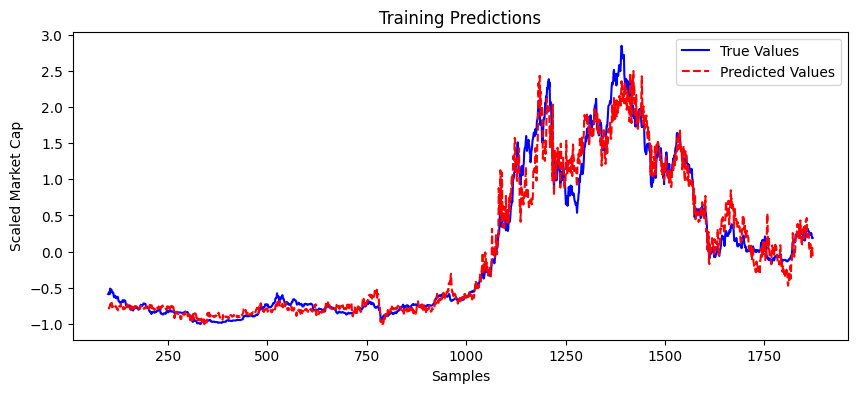

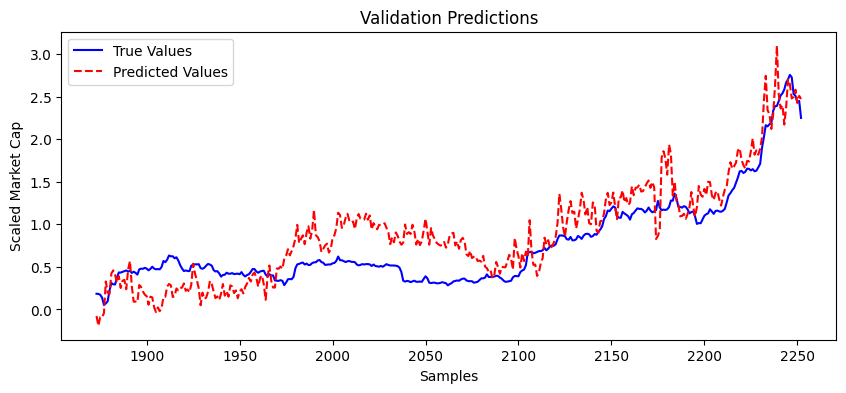

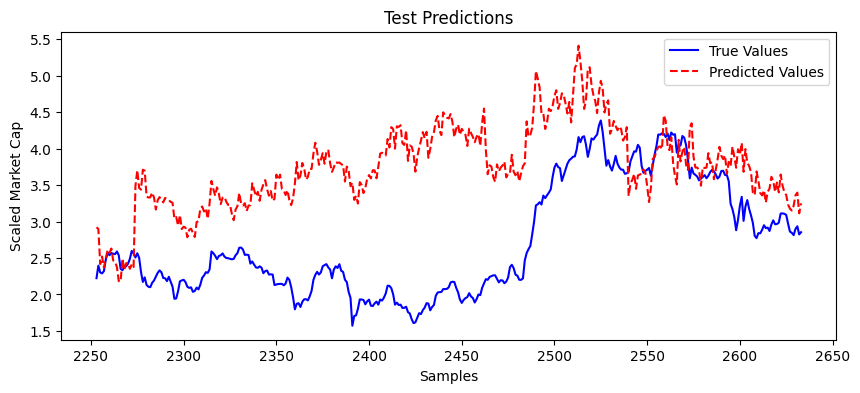

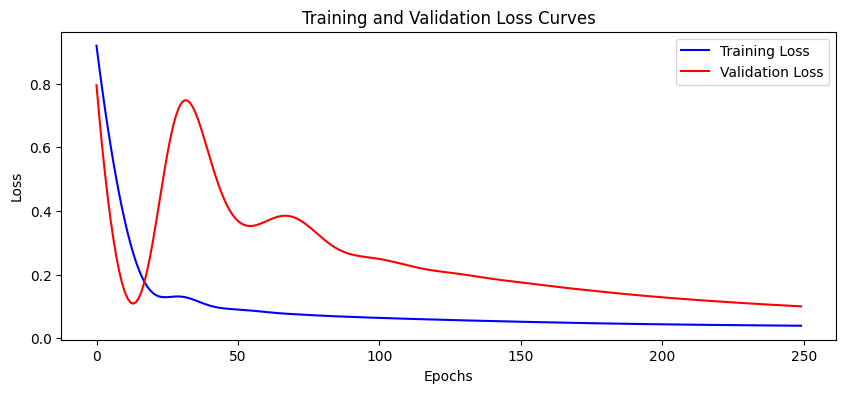

In [94]:
#1. Initialize model
gru_model = GRUModel(
    input_size=input_size,
    hidden_size=128,
    num_layers=1,
    dropout=0.0,
    use_layernorm=False
)

#2. Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(gru_model.parameters(), lr=lr/10)

#3. Reshape data for gru (needs [batch, seq_len, features])
# Since we're doing single-step prediction, seq_len=1
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)

#4. Train the model
train_losses, val_losses = train_model(
    model=gru_model, 
    criterion=criterion, 
    optimizer=optimizer,
    X_train=X_train_tensor, 
    y_train=y_train_tensor,
    X_val=X_val_tensor, 
    y_val=y_val_tensor,
    epochs=250
)

#5. Evaluate the model on train, validation, and test sets
gru_model.eval()
with torch.no_grad():
    train_pred = gru_model(X_train_tensor)
    val_pred = gru_model(X_val_tensor)
    test_pred = gru_model(X_test_tensor)
    
    train_metrics = evaluate_model(y_train_tensor.numpy(), train_pred)
    val_metrics = evaluate_model(y_val_tensor.numpy(), val_pred)
    test_metrics = evaluate_model(y_test_tensor.numpy(), test_pred)

#6. Print metric results
print_combined_evaluation_metrics(train_metrics, val_metrics, test_metrics)

#7. Plot predictions and loss curves
plot_predictions(y_train, train_pred.squeeze().numpy(), TRAIN_INDICES, "Training Predictions")
plot_predictions(y_val, val_pred.squeeze().numpy(), VAL_INDICES, "Validation Predictions")
plot_predictions(y_test, test_pred.squeeze().numpy(), TEST_INDICES, "Test Predictions")
plot_loss_curves(train_losses, val_losses)

## **Experimental Results**
To evaluate our approach for predicting the cryptocurrency market capitalization, we explored four distinct families of models: Linear Regression, Artificial Neural Networks (ANN), Long Short-Term Memory (LSTM) networks, and Gated Recurrent Units (GRU). These models were chosen to reflect a gradient of complexity—ranging from simple linear approaches to more sophisticated sequence-based deep learning models.

Despite sharing similar performance trends across the board, each model family demonstrated unique strengths depending on the evaluation metric. Below are the best-performing models from each family respectively based on the test results (Linear Regressor, ANN, LSTM, GRU):  

### *Evaluation Metrics*:  
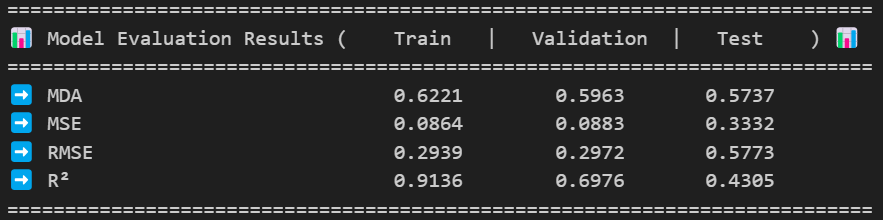
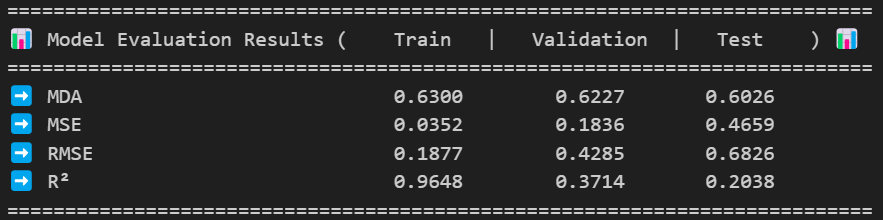
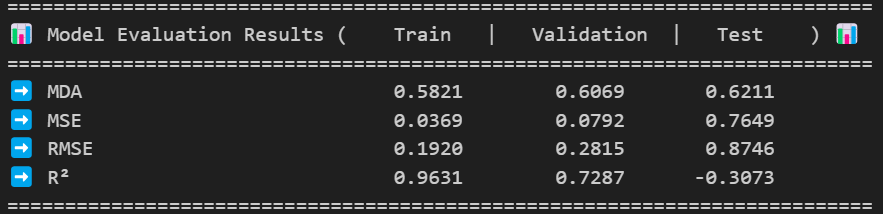  
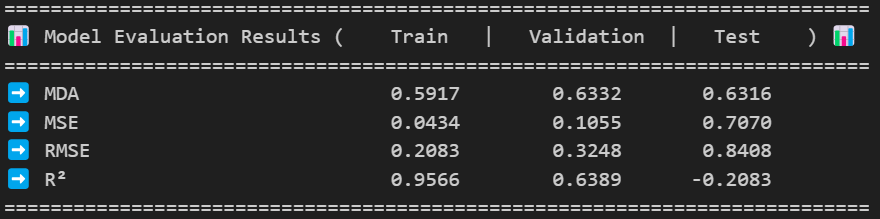

From the results, we observe that:

- Linear Regression yielded the best overall performance across traditional regression metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score. This indicates a strong ability to predict the absolute value of the market cap, staying close to actual values.

- However, when we shift our focus to MDA (Mean Directional Accuracy), a metric that measures the model’s ability to correctly predict the direction (up/down) of the market, the more complex models like LSTM and GRU performed significantly better. GRU achieved the highest MDA of 0.6316, implying it correctly predicts the direction of the market approximately 63% of the time. This is considerably better than random guessing (50%) and holds real-world significance for traders and analysts.  

### *Predictions vs Ground Truth*:  
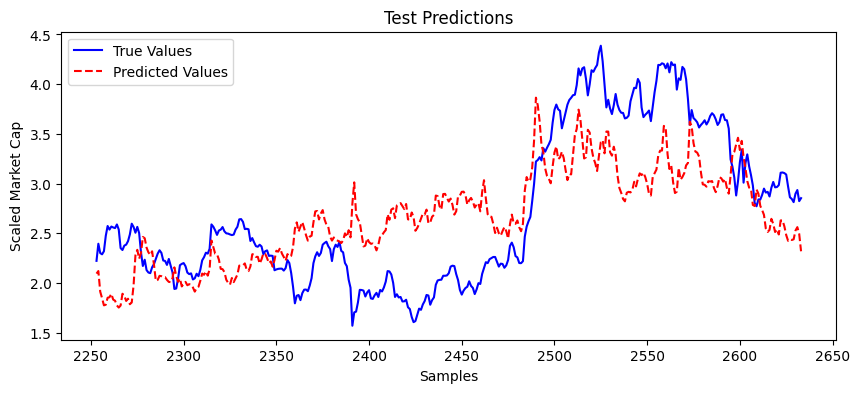
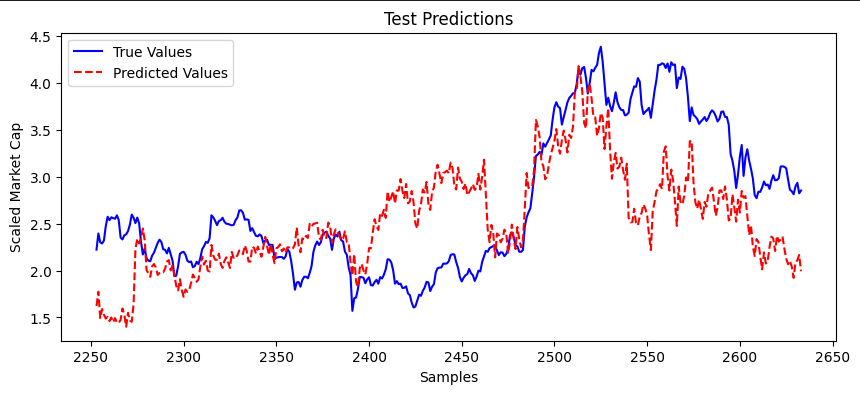
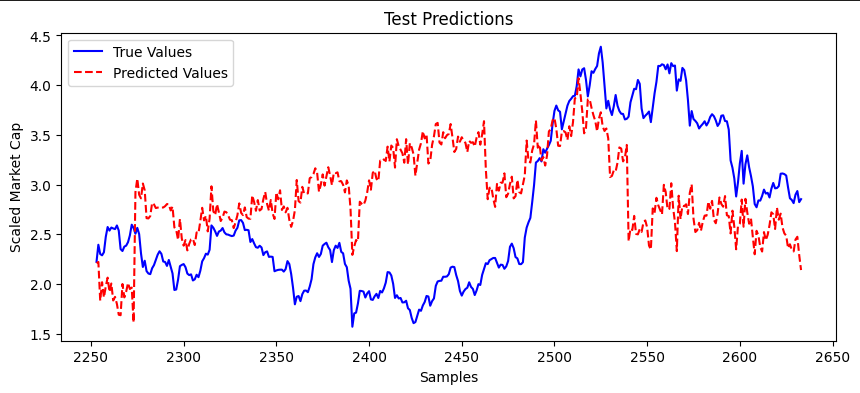
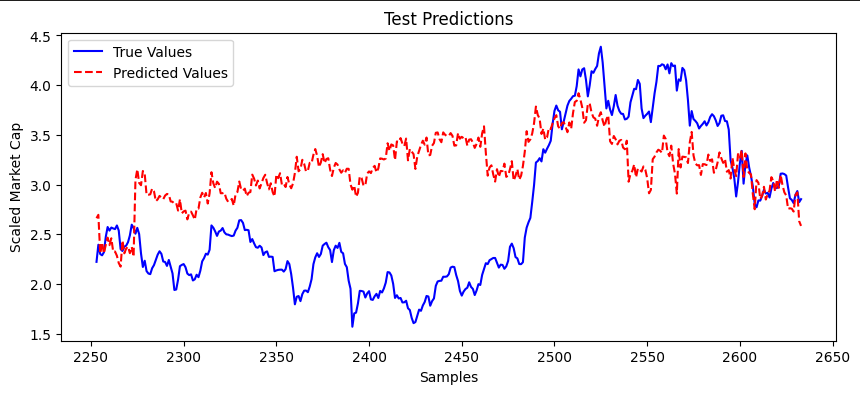

From the prediction plots, a few key observations emerge:

- Linear Regression predictions tend to follow the actual market cap trend closely with smoother lines and fewer extreme deviations. This explains their superior performance in MSE and R².

- Conversely, ANN, LSTM and GRU predictions exhibit higher fluctuations. While this may reduce precision in terms of absolute error, it seems to better capture the turning points in the market—hence the improved MDA. This suggests that these models are more sensitive to temporal patterns and momentum shifts, even if their numerical estimates are less precise.

### *Further Discussion*:
The trade-off between directional accuracy (MDA) and numerical precision (MSE, RMSE, R²) raises an important consideration in financial forecasting: what matters more—predicting the correct value, or anticipating the right direction?

- If the use-case is trading, MDA is arguably more valuable, since knowing whether the market will go up or down can inform buy/sell decisions.

- If the use-case is valuation or reporting, then MSE and R² might be more important.

Interestingly, while more complex models like LSTM and GRU offer better MDA, their poorer R² and higher error values might suggest overfitting or difficulty in modeling the magnitude of change. This could be improved through further hyperparameter tuning, regularization, or feature engineering.

## **Conclusions**

In this study, we evaluated the effectiveness of four different model families—Linear Regression, ANN, LSTM, and GRU—in predicting the cryptocurrency market capitalization. Through a comparative analysis of key performance metrics such as MSE, RMSE, R², and MDA, we observed a trade-off between numerical accuracy and directional accuracy.

We conclude the following:

- Linear Regression performed best in traditional regression metrics (MSE, RMSE, R²), indicating it can closely estimate the actual market cap values with relatively low error, despite its simplicity.

- LSTM and GRU, while more complex, outperformed all other models in Mean Directional Accuracy (MDA). The GRU model in particular achieved an MDA of 0.6316, suggesting that these models are better at anticipating the market's directional movements—a critical factor in financial forecasting and trading strategies.

ANN delivered balanced results, but did not surpass either linear or sequential models in any metric, suggesting that without temporal memory, it struggles to fully capture the complex dynamics of the crypto market.

We could conclude that:

- Simpler models may be more suitable when accurate value prediction is the primary goal.

- More advanced sequence models (LSTM, GRU) are better suited for predicting directional trends.

However, we could not conclusively determine:

- Whether these models would generalize well to different cryptocurrencies or across significantly different time periods without further validation.

- How these models would perform under live market conditions with real-time data and non-stationary behavior, which remains an open area for future investigation.

In future work, incorporating additional features such as sentiment analysis, trading volume, or macroeconomic indicators, as well as experimenting with hybrid or ensemble models, could further enhance both accuracy and robustness.



## **References**

[1] Nomiizz, *KryptoOracle*. [Online]. Available: https://github.com/Nomiizz/KryptoOracle  
[2] V. B. Mokin, "Crypto BTC Advanced Analysis Forecasting," *Kaggle*, [Online]. Available: https://www.kaggle.com/code/vbmokin/crypto-btc-advanced-analysis-forecasting  
[3] CoinCodex, "Cryptocurrency Prices, Charts And Market Capitalizations," [Online]. Available: https://coincodex.com/  
[4] Nasdaq, "S&P 500 Index Historical Data," [Online]. Available: https://www.nasdaq.com/market-activity/index/spx/historical?page=1&rows_per_page=10&timeline=y10  
[5] CBOE, "VIX Historical Data," [Online]. Available: https://www.cboe.com/tradable_products/vix/vix_historical_data/  
[6] Kaggle, "Datasets and Code Notebooks," [Online]. Available: https://www.kaggle.com/  
[7] S. Sharma, "Principal Steps of a Machine Learning Project," *Medium*, Jul. 2020. [Online]. Available: https://medium.com/analytics-vidhya/principal-steps-of-a-machine-learning-project-7d7dcc6fe68b  
[8] I. Jain, "Choosing the Right Correlation: Pearson vs. Spearman vs. Kendall’s Tau," *Medium*, 2020. [Online]. Available: https://ishanjainoffical.medium.com/choosing-the-right-correlation-pearson-vs-spearman-vs-kendalls-tau-02dc7d7dd01d  
[9] Wikipedia, "Mean directional accuracy," [Online]. Available: https://en.wikipedia.org/wiki/Mean_directional_accuracy#:~:text=Mean%20directional%20accuracy%20(MDA)%2C%20to%20the%20actual%20realized%20direction.  
[10] Emojipedia, "Home," [Online]. Available: https://emojipedia.org/  
[11] Jillani Soft Tech, "Building an ANN with PyTorch: A Deep Dive into Neural Network Training," *Medium*, [Online]. Available: https://jillanisofttech.medium.com/building-an-ann-with-pytorch-a-deep-dive-into-neural-network-training-a7fdaa047d81  
[12] Microsoft Data Science, "Introduction to Feature Engineering for Time Series Forecasting," *Medium*, [Online]. Available: https://medium.com/data-science-at-microsoft/introduction-to-feature-engineering-for-time-series-forecasting-620aa55fcab0  
[13] A. V. Nikitin, *tsgm Tutorials – Augmentations*, GitHub, [Online]. Available: https://github.com/AlexanderVNikitin/tsgm/blob/main/tutorials/augmentations.ipynb  
[14] M. Rowe-Prediger, "Using PyTorch to Train an LSTM Forecasting Model," *Medium*, [Online]. Available: https://medium.com/@mike.roweprediger/using-pytorch-to-train-an-lstm-forecasting-model-e5a04b6e0e67  
[15] H. Andika, "Leveraging Moving Average in Machine Learning Models," *Medium*, [Online]. Available: https://medium.com/@heriandika/leveraging-moving-average-in-machine-learning-models-03b4a7877f7a  
[16] *Biased Algorithms*, "Batch Normalization vs Layer Normalization," *Medium*, [Online]. Available: https://medium.com/biased-algorithms/batch-normalization-vs-layer-normalization-c44472883bf2